# Compare Cumulative Water Balance between Pathways

Two pathways are used within the framework.

1. H0: null hypothesis of historical weather statistics
2. H1: alternative hypothesis of weather statistics extracted from down-scaled, global climate model results.

There are four analysis periods

1. Data Period: 1981-2010
2. Projection Period 1: 2011-2040
3. Projection Period 2: 2041-2070
4. Projection Period 3: 2071-2100

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
from math import floor, ceil
from copy import deepcopy

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# input directories and file roots
IN_DIR = r'C:\Temp\WG_Test_Out\Test1'
OUT_DIR = r'C:\Temp\WG_Test_Out\Test1\Processed'
OUT_ROOT = "DC_WGMN1"
IN_H0ROOT1 = "WB_H0_%s_R" % OUT_ROOT
IN_H1ROOT1 = "WB_H1_%s_R" % OUT_ROOT
IN_ROOT2 = "_DF.pickle"
NUMREAL = 10000

In [5]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [6]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [7]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [8]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [9]:
WB_In_Hdrs = [ "Precip_mm", #0
               "ETo_mm", #1
               "PET_mm", #2
               "P-PET_mm", #3
               "APWL_mm", #4
               "SM_mm", #5
               "DelSM_mm", #6
               "AET_mm", #7
               "Def_mm", #8
               "Surp_mm", #9
               "TotAvail_mm", #10
               "RO_mm", #11
               "Detent_mm", #12
               "Re_mm", #13
             ]

## Collate DataFrames

### H0

Go through all realizations and create a DataFrame for each constituent and each period

In [10]:
for rR in range( 1, NUMREAL + 1, 1 ):
    if ((rR % 500) == 0):
        print("Working on realization %d" % rR)
    # end if
    InFile = "%s%d%s" % ( IN_H0ROOT1, rR, IN_ROOT2 )
    InFP = os.path.normpath( os.path.join( IN_DIR, InFile ) )
    InDF = pd.read_pickle( InFP, compression='zip' )
    if rR <= 1:
        # data period
        H0Precip1 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0Precip1["R_%d" % rR] = H0Precip1[WB_In_Hdrs[0]].cumsum( )
        H0Precip1.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H0PET1 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0PET1["R_%d" % rR] = H0PET1[WB_In_Hdrs[2]].cumsum( )
        H0PET1.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H0AET1 = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0AET1["R_%d" % rR] = H0AET1[WB_In_Hdrs[7]].cumsum( )
        H0AET1.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H0RO1 = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0RO1["R_%d" % rR] = H0RO1[WB_In_Hdrs[11]].cumsum( )
        H0RO1.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H0RE1 = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0RE1["R_%d" % rR] = H0RE1[WB_In_Hdrs[13]].cumsum( )
        H0RE1.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        # Projection 1
        H0Precip2 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0Precip2["R_%d" % rR] = H0Precip2[WB_In_Hdrs[0]].cumsum( )
        H0Precip2.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H0PET2 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0PET2["R_%d" % rR] = H0PET2[WB_In_Hdrs[2]].cumsum( )
        H0PET2.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H0AET2 = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0AET2["R_%d" % rR] = H0AET2[WB_In_Hdrs[7]].cumsum( )
        H0AET2.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H0RO2 = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0RO2["R_%d" % rR] = H0RO2[WB_In_Hdrs[11]].cumsum( )
        H0RO2.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H0RE2 = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0RE2["R_%d" % rR] = H0RE2[WB_In_Hdrs[13]].cumsum( )
        H0RE2.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        # Projection 2
        H0Precip3 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0Precip3["R_%d" % rR] = H0Precip3[WB_In_Hdrs[0]].cumsum( )
        H0Precip3.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H0PET3 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0PET3["R_%d" % rR] = H0PET3[WB_In_Hdrs[2]].cumsum( )
        H0PET3.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H0AET3 = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0AET3["R_%d" % rR] = H0AET3[WB_In_Hdrs[7]].cumsum( )
        H0AET3.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H0RO3 = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0RO3["R_%d" % rR] = H0RO3[WB_In_Hdrs[11]].cumsum( )
        H0RO3.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H0RE3 = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0RE3["R_%d" % rR] = H0RE3[WB_In_Hdrs[13]].cumsum( )
        H0RE3.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        # Projection 3
        H0Precip4 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0Precip4["R_%d" % rR] = H0Precip4[WB_In_Hdrs[0]].cumsum( )
        H0Precip4.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H0PET4 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0PET4["R_%d" % rR] = H0PET4[WB_In_Hdrs[2]].cumsum( )
        H0PET4.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H0AET4 = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0AET4["R_%d" % rR] = H0AET4[WB_In_Hdrs[7]].cumsum( )
        H0AET4.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H0RO4 = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0RO4["R_%d" % rR] = H0RO4[WB_In_Hdrs[11]].cumsum( )
        H0RO4.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H0RE4 = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0RE4["R_%d" % rR] = H0RE4[WB_In_Hdrs[13]].cumsum( )
        H0RE4.drop( columns=[WB_In_Hdrs[13]], inplace=True)
    else:
        # data period
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WB_In_Hdrs[0]].cumsum( )
        tmpPre.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H0Precip1 = H0Precip1.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpH0PET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpH0PET["R_%d" % rR] = tmpH0PET[WB_In_Hdrs[2]].cumsum( )
        tmpH0PET.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H0PET1 = H0PET1.merge( tmpH0PET, how='inner', left_index=True, right_index=True )
        tmpH0AET = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpH0AET["R_%d" % rR] = tmpH0AET[WB_In_Hdrs[7]].cumsum( )
        tmpH0AET.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H0AET1 = H0AET1.merge( tmpH0AET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpRO["R_%d" % rR] = tmpRO[WB_In_Hdrs[11]].cumsum( )
        tmpRO.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H0RO1 = H0RO1.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpRE["R_%d" % rR] = tmpRE[WB_In_Hdrs[13]].cumsum( )
        tmpRE.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        H0RE1 = H0RE1.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 1
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WB_In_Hdrs[0]].cumsum( )
        tmpPre.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H0Precip2 = H0Precip2.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpH0PET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpH0PET["R_%d" % rR] = tmpH0PET[WB_In_Hdrs[2]].cumsum( )
        tmpH0PET.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H0PET2 = H0PET2.merge( tmpH0PET, how='inner', left_index=True, right_index=True )
        tmpH0AET = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpH0AET["R_%d" % rR] = tmpH0AET[WB_In_Hdrs[7]].cumsum( )
        tmpH0AET.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H0AET2 = H0AET2.merge( tmpH0AET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpRO["R_%d" % rR] = tmpRO[WB_In_Hdrs[11]].cumsum( )
        tmpRO.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H0RO2 = H0RO2.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpRE["R_%d" % rR] = tmpRE[WB_In_Hdrs[13]].cumsum( )
        tmpRE.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        H0RE2 = H0RE2.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 2
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WB_In_Hdrs[0]].cumsum( )
        tmpPre.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H0Precip3 = H0Precip3.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpH0PET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpH0PET["R_%d" % rR] = tmpH0PET[WB_In_Hdrs[2]].cumsum( )
        tmpH0PET.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H0PET3 = H0PET3.merge( tmpH0PET, how='inner', left_index=True, right_index=True )
        tmpH0AET = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpH0AET["R_%d" % rR] = tmpH0AET[WB_In_Hdrs[7]].cumsum( )
        tmpH0AET.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H0AET3 = H0AET3.merge( tmpH0AET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpRO["R_%d" % rR] = tmpRO[WB_In_Hdrs[11]].cumsum( )
        tmpRO.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H0RO3 = H0RO3.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpRE["R_%d" % rR] = tmpRE[WB_In_Hdrs[13]].cumsum( )
        tmpRE.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        H0RE3 = H0RE3.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 3
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WB_In_Hdrs[0]].cumsum( )
        tmpPre.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H0Precip4 = H0Precip4.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpH0PET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpH0PET["R_%d" % rR] = tmpH0PET[WB_In_Hdrs[2]].cumsum( )
        tmpH0PET.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H0PET4 = H0PET4.merge( tmpH0PET, how='inner', left_index=True, right_index=True )
        tmpH0AET = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpH0AET["R_%d" % rR] = tmpH0AET[WB_In_Hdrs[7]].cumsum( )
        tmpH0AET.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H0AET4 = H0AET4.merge( tmpH0AET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpRO["R_%d" % rR] = tmpRO[WB_In_Hdrs[11]].cumsum( )
        tmpRO.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H0RO4 = H0RO4.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpRE["R_%d" % rR] = tmpRE[WB_In_Hdrs[13]].cumsum( )
        tmpRE.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        H0RE4 = H0RE4.merge( tmpRE, how='inner', left_index=True, right_index=True )
    # end if
# end for

Working on realization 500
Working on realization 1000
Working on realization 1500
Working on realization 2000
Working on realization 2500
Working on realization 3000
Working on realization 3500
Working on realization 4000
Working on realization 4500
Working on realization 5000
Working on realization 5500
Working on realization 6000
Working on realization 6500
Working on realization 7000
Working on realization 7500
Working on realization 8000
Working on realization 8500
Working on realization 9000
Working on realization 9500
Working on realization 10000


This loop takes a long time so output this files to pickles now

In [11]:
OFNamer = "Cum_H0_Precip1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Precip1.to_pickle( OFPath, compression='zip' )
#H0Precip1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_PET1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0PET1.to_pickle( OFPath, compression='zip' )
#H0PET1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_AET1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0AET1.to_pickle( OFPath, compression='zip' )
#H0AET1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_RO1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0RO1.to_pickle( OFPath, compression='zip' )
#H0RO1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_RE1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0RE1.to_pickle( OFPath, compression='zip' )
#H0RE1 = pd.read_pickle( OFPath, compression='zip' )

In [12]:
OFNamer = "Cum_H0_Precip2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Precip2.to_pickle( OFPath, compression='zip' )
#H0Precip2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_PET2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0PET2.to_pickle( OFPath, compression='zip' )
#H0PET2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_AET2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0AET2.to_pickle( OFPath, compression='zip' )
#H0AET2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_RO2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0RO2.to_pickle( OFPath, compression='zip' )
#H0RO2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_RE2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0RE2.to_pickle( OFPath, compression='zip' )
#H0RE2 = pd.read_pickle( OFPath, compression='zip' )

In [13]:
OFNamer = "Cum_H0_Precip3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Precip3.to_pickle( OFPath, compression='zip' )
#H0Precip3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_PET3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0PET3.to_pickle( OFPath, compression='zip' )
#H0PET3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_AET3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0AET3.to_pickle( OFPath, compression='zip' )
#H0AET3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_RO3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0RO3.to_pickle( OFPath, compression='zip' )
#H0RO3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_RE3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0RE3.to_pickle( OFPath, compression='zip' )
#H0RE3 = pd.read_pickle( OFPath, compression='zip' )

In [14]:
OFNamer = "Cum_H0_Precip4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Precip4.to_pickle( OFPath, compression='zip' )
#H0Precip4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_PET4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0PET4.to_pickle( OFPath, compression='zip' )
#H0PET4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_AET4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0AET4.to_pickle( OFPath, compression='zip' )
#H0AET4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_RO4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0RO4.to_pickle( OFPath, compression='zip' )
#H0RO4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H0_RE4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0RE4.to_pickle( OFPath, compression='zip' )
#H0RE4 = pd.read_pickle( OFPath, compression='zip' )

### H1

Go through all realizations and create a DataFrame for each constituent and each period

In [15]:
for rR in range( 1, NUMREAL + 1, 1 ):
    if ((rR % 500) == 0):
        print("Working on realization %d" % rR)
    # end if
    InFile = "%s%d%s" % ( IN_H1ROOT1, rR, IN_ROOT2 )
    InFP = os.path.normpath( os.path.join( IN_DIR, InFile ) )
    InDF = pd.read_pickle( InFP, compression='zip' )
    if rR <= 1:
        # data period
        H1Precip1 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1Precip1["R_%d" % rR] = H1Precip1[WB_In_Hdrs[0]].cumsum( )
        H1Precip1.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H1PET1 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1PET1["R_%d" % rR] = H1PET1[WB_In_Hdrs[2]].cumsum( )
        H1PET1.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H1AET1 = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1AET1["R_%d" % rR] = H1AET1[WB_In_Hdrs[7]].cumsum( )
        H1AET1.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H1RO1 = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1RO1["R_%d" % rR] = H1RO1[WB_In_Hdrs[11]].cumsum( )
        H1RO1.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H1RE1 = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1RE1["R_%d" % rR] = H1RE1[WB_In_Hdrs[13]].cumsum( )
        H1RE1.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        # Projection 1
        H1Precip2 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1Precip2["R_%d" % rR] = H1Precip2[WB_In_Hdrs[0]].cumsum( )
        H1Precip2.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H1PET2 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1PET2["R_%d" % rR] = H1PET2[WB_In_Hdrs[2]].cumsum( )
        H1PET2.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H1AET2 = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1AET2["R_%d" % rR] = H1AET2[WB_In_Hdrs[7]].cumsum( )
        H1AET2.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H1RO2 = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1RO2["R_%d" % rR] = H1RO2[WB_In_Hdrs[11]].cumsum( )
        H1RO2.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H1RE2 = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1RE2["R_%d" % rR] = H1RE2[WB_In_Hdrs[13]].cumsum( )
        H1RE2.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        # Projection 2
        H1Precip3 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1Precip3["R_%d" % rR] = H1Precip3[WB_In_Hdrs[0]].cumsum( )
        H1Precip3.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H1PET3 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1PET3["R_%d" % rR] = H1PET3[WB_In_Hdrs[2]].cumsum( )
        H1PET3.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H1AET3 = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1AET3["R_%d" % rR] = H1AET3[WB_In_Hdrs[7]].cumsum( )
        H1AET3.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H1RO3 = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1RO3["R_%d" % rR] = H1RO3[WB_In_Hdrs[11]].cumsum( )
        H1RO3.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H1RE3 = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1RE3["R_%d" % rR] = H1RE3[WB_In_Hdrs[13]].cumsum( )
        H1RE3.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        # Projection 3
        H1Precip4 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1Precip4["R_%d" % rR] = H1Precip4[WB_In_Hdrs[0]].cumsum( )
        H1Precip4.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H1PET4 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1PET4["R_%d" % rR] = H1PET4[WB_In_Hdrs[2]].cumsum( )
        H1PET4.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H1AET4 = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1AET4["R_%d" % rR] = H1AET4[WB_In_Hdrs[7]].cumsum( )
        H1AET4.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H1RO4 = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1RO4["R_%d" % rR] = H1RO4[WB_In_Hdrs[11]].cumsum( )
        H1RO4.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H1RE4 = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1RE4["R_%d" % rR] = H1RE4[WB_In_Hdrs[13]].cumsum( )
        H1RE4.drop( columns=[WB_In_Hdrs[13]], inplace=True)
    else:
        # data period
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WB_In_Hdrs[0]].cumsum( )
        tmpPre.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H1Precip1 = H1Precip1.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpH1PET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpH1PET["R_%d" % rR] = tmpH1PET[WB_In_Hdrs[2]].cumsum( )
        tmpH1PET.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H1PET1 = H1PET1.merge( tmpH1PET, how='inner', left_index=True, right_index=True )
        tmpH1AET = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpH1AET["R_%d" % rR] = tmpH1AET[WB_In_Hdrs[7]].cumsum( )
        tmpH1AET.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H1AET1 = H1AET1.merge( tmpH1AET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpRO["R_%d" % rR] = tmpRO[WB_In_Hdrs[11]].cumsum( )
        tmpRO.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H1RO1 = H1RO1.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpRE["R_%d" % rR] = tmpRE[WB_In_Hdrs[13]].cumsum( )
        tmpRE.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        H1RE1 = H1RE1.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 1
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WB_In_Hdrs[0]].cumsum( )
        tmpPre.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H1Precip2 = H1Precip2.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpH1PET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpH1PET["R_%d" % rR] = tmpH1PET[WB_In_Hdrs[2]].cumsum( )
        tmpH1PET.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H1PET2 = H1PET2.merge( tmpH1PET, how='inner', left_index=True, right_index=True )
        tmpH1AET = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpH1AET["R_%d" % rR] = tmpH1AET[WB_In_Hdrs[7]].cumsum( )
        tmpH1AET.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H1AET2 = H1AET2.merge( tmpH1AET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpRO["R_%d" % rR] = tmpRO[WB_In_Hdrs[11]].cumsum( )
        tmpRO.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H1RO2 = H1RO2.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpRE["R_%d" % rR] = tmpRE[WB_In_Hdrs[13]].cumsum( )
        tmpRE.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        H1RE2 = H1RE2.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 2
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WB_In_Hdrs[0]].cumsum( )
        tmpPre.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H1Precip3 = H1Precip3.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpH1PET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpH1PET["R_%d" % rR] = tmpH1PET[WB_In_Hdrs[2]].cumsum( )
        tmpH1PET.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H1PET3 = H1PET3.merge( tmpH1PET, how='inner', left_index=True, right_index=True )
        tmpH1AET = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpH1AET["R_%d" % rR] = tmpH1AET[WB_In_Hdrs[7]].cumsum( )
        tmpH1AET.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H1AET3 = H1AET3.merge( tmpH1AET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpRO["R_%d" % rR] = tmpRO[WB_In_Hdrs[11]].cumsum( )
        tmpRO.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H1RO3 = H1RO3.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpRE["R_%d" % rR] = tmpRE[WB_In_Hdrs[13]].cumsum( )
        tmpRE.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        H1RE3 = H1RE3.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 3
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WB_In_Hdrs[0]].cumsum( )
        tmpPre.drop( columns=[WB_In_Hdrs[0]], inplace=True)
        H1Precip4 = H1Precip4.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpH1PET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpH1PET["R_%d" % rR] = tmpH1PET[WB_In_Hdrs[2]].cumsum( )
        tmpH1PET.drop( columns=[WB_In_Hdrs[2]], inplace=True)
        H1PET4 = H1PET4.merge( tmpH1PET, how='inner', left_index=True, right_index=True )
        tmpH1AET = InDF[[WB_In_Hdrs[7]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpH1AET["R_%d" % rR] = tmpH1AET[WB_In_Hdrs[7]].cumsum( )
        tmpH1AET.drop( columns=[WB_In_Hdrs[7]], inplace=True)
        H1AET4 = H1AET4.merge( tmpH1AET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[11]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpRO["R_%d" % rR] = tmpRO[WB_In_Hdrs[11]].cumsum( )
        tmpRO.drop( columns=[WB_In_Hdrs[11]], inplace=True)
        H1RO4 = H1RO4.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[13]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpRE["R_%d" % rR] = tmpRE[WB_In_Hdrs[13]].cumsum( )
        tmpRE.drop( columns=[WB_In_Hdrs[13]], inplace=True)
        H1RE4 = H1RE4.merge( tmpRE, how='inner', left_index=True, right_index=True )
    # end if
# end for

Working on realization 500
Working on realization 1000
Working on realization 1500
Working on realization 2000
Working on realization 2500
Working on realization 3000
Working on realization 3500
Working on realization 4000
Working on realization 4500
Working on realization 5000
Working on realization 5500
Working on realization 6000
Working on realization 6500
Working on realization 7000
Working on realization 7500
Working on realization 8000
Working on realization 8500
Working on realization 9000
Working on realization 9500
Working on realization 10000


This loop takes a long time so output this files to pickles now

In [16]:
OFNamer = "Cum_H1_Precip1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Precip1.to_pickle( OFPath, compression='zip' )
#H1Precip1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_PET1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1PET1.to_pickle( OFPath, compression='zip' )
#H1PET1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_AET1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1AET1.to_pickle( OFPath, compression='zip' )
#H1AET1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_RO1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1RO1.to_pickle( OFPath, compression='zip' )
#H1RO1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_RE1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1RE1.to_pickle( OFPath, compression='zip' )
#H1RE1 = pd.read_pickle( OFPath, compression='zip' )

In [17]:
OFNamer = "Cum_H1_Precip2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Precip2.to_pickle( OFPath, compression='zip' )
#H1Precip2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_PET2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1PET2.to_pickle( OFPath, compression='zip' )
#H1PET2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_AET2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1AET2.to_pickle( OFPath, compression='zip' )
#H1AET2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_RO2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1RO2.to_pickle( OFPath, compression='zip' )
#H1RO2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_RE2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1RE2.to_pickle( OFPath, compression='zip' )
#H1RE2 = pd.read_pickle( OFPath, compression='zip' )

In [18]:
OFNamer = "Cum_H1_Precip3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Precip3.to_pickle( OFPath, compression='zip' )
#H1Precip3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_PET3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1PET3.to_pickle( OFPath, compression='zip' )
#H1PET3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_AET3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1AET3.to_pickle( OFPath, compression='zip' )
#H1AET3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_RO3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1RO3.to_pickle( OFPath, compression='zip' )
#H1RO3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_RE3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1RE3.to_pickle( OFPath, compression='zip' )
#H1RE3 = pd.read_pickle( OFPath, compression='zip' )

In [19]:
OFNamer = "Cum_H1_Precip4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Precip4.to_pickle( OFPath, compression='zip' )
#H1Precip4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_PET4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1PET4.to_pickle( OFPath, compression='zip' )
#H1PET4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_AET4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1AET4.to_pickle( OFPath, compression='zip' )
#H1AET4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_RO4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1RO4.to_pickle( OFPath, compression='zip' )
#H1RO4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "Cum_H1_RE4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1RE4.to_pickle( OFPath, compression='zip' )
#H1RE4 = pd.read_pickle( OFPath, compression='zip' )

## Calculate Time History Stats

Calculate the time history stats now for each DataFrame

### H0

In [20]:
DictH0Pre1 = dict()
DictH0Pre2 = dict()
DictH0Pre3 = dict()
DictH0Pre4 = dict()
DictH0PET1 = dict()
DictH0PET2 = dict()
DictH0PET3 = dict()
DictH0PET4 = dict()
DictH0AET1 = dict()
DictH0AET2 = dict()
DictH0AET3 = dict()
DictH0AET4 = dict()
DictH0RO1 = dict()
DictH0RO2 = dict()
DictH0RO3 = dict()
DictH0RO4 = dict()
DictH0RE1 = dict()
DictH0RE2 = dict()
DictH0RE3 = dict()
DictH0RE4 = dict()
hdrCnt = 0
# start out by doing the percentiles
for iI in range(NumQs):
    curQ = OurQs[iI]
    DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0PET1[StatsHdsList[hdrCnt]] = H0PET1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0PET2[StatsHdsList[hdrCnt]] = H0PET2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0PET3[StatsHdsList[hdrCnt]] = H0PET3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0PET4[StatsHdsList[hdrCnt]] = H0PET4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0AET1[StatsHdsList[hdrCnt]] = H0AET1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0AET2[StatsHdsList[hdrCnt]] = H0AET2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0AET3[StatsHdsList[hdrCnt]] = H0AET3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0AET4[StatsHdsList[hdrCnt]] = H0AET4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0RO1[StatsHdsList[hdrCnt]] = H0RO1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0RO2[StatsHdsList[hdrCnt]] = H0RO2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0RO3[StatsHdsList[hdrCnt]] = H0RO3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0RO4[StatsHdsList[hdrCnt]] = H0RO4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0RE1[StatsHdsList[hdrCnt]] = H0RE1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0RE2[StatsHdsList[hdrCnt]] = H0RE2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0RE3[StatsHdsList[hdrCnt]] = H0RE3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0RE4[StatsHdsList[hdrCnt]] = H0RE4.quantile( q=curQ, axis=1 ).to_numpy()
    hdrCnt += 1
# end for
DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.mean( axis=1 ).to_numpy()
DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.mean( axis=1 ).to_numpy()
DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.mean( axis=1 ).to_numpy()
DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.mean( axis=1 ).to_numpy()
DictH0PET1[StatsHdsList[hdrCnt]] = H0PET1.mean( axis=1 ).to_numpy()
DictH0PET2[StatsHdsList[hdrCnt]] = H0PET2.mean( axis=1 ).to_numpy()
DictH0PET3[StatsHdsList[hdrCnt]] = H0PET3.mean( axis=1 ).to_numpy()
DictH0PET4[StatsHdsList[hdrCnt]] = H0PET4.mean( axis=1 ).to_numpy()
DictH0AET1[StatsHdsList[hdrCnt]] = H0AET1.mean( axis=1 ).to_numpy()
DictH0AET2[StatsHdsList[hdrCnt]] = H0AET2.mean( axis=1 ).to_numpy()
DictH0AET3[StatsHdsList[hdrCnt]] = H0AET3.mean( axis=1 ).to_numpy()
DictH0AET4[StatsHdsList[hdrCnt]] = H0AET4.mean( axis=1 ).to_numpy()
DictH0RO1[StatsHdsList[hdrCnt]] = H0RO1.mean( axis=1 ).to_numpy()
DictH0RO2[StatsHdsList[hdrCnt]] = H0RO2.mean( axis=1 ).to_numpy()
DictH0RO3[StatsHdsList[hdrCnt]] = H0RO3.mean( axis=1 ).to_numpy()
DictH0RO4[StatsHdsList[hdrCnt]] = H0RO4.mean( axis=1 ).to_numpy()
DictH0RE1[StatsHdsList[hdrCnt]] = H0RE1.mean( axis=1 ).to_numpy()
DictH0RE2[StatsHdsList[hdrCnt]] = H0RE2.mean( axis=1 ).to_numpy()
DictH0RE3[StatsHdsList[hdrCnt]] = H0RE3.mean( axis=1 ).to_numpy()
DictH0RE4[StatsHdsList[hdrCnt]] = H0RE4.mean( axis=1 ).to_numpy()
hdrCnt += 1

In [21]:
DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.var( axis=1 ).to_numpy()
DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.var( axis=1 ).to_numpy()
DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.var( axis=1 ).to_numpy()
DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.var( axis=1 ).to_numpy()
DictH0PET1[StatsHdsList[hdrCnt]] = H0PET1.var( axis=1 ).to_numpy()
DictH0PET2[StatsHdsList[hdrCnt]] = H0PET2.var( axis=1 ).to_numpy()
DictH0PET3[StatsHdsList[hdrCnt]] = H0PET3.var( axis=1 ).to_numpy()
DictH0PET4[StatsHdsList[hdrCnt]] = H0PET4.var( axis=1 ).to_numpy()
DictH0AET1[StatsHdsList[hdrCnt]] = H0AET1.var( axis=1 ).to_numpy()
DictH0AET2[StatsHdsList[hdrCnt]] = H0AET2.var( axis=1 ).to_numpy()
DictH0AET3[StatsHdsList[hdrCnt]] = H0AET3.var( axis=1 ).to_numpy()
DictH0AET4[StatsHdsList[hdrCnt]] = H0AET4.var( axis=1 ).to_numpy()
DictH0RO1[StatsHdsList[hdrCnt]] = H0RO1.var( axis=1 ).to_numpy()
DictH0RO2[StatsHdsList[hdrCnt]] = H0RO2.var( axis=1 ).to_numpy()
DictH0RO3[StatsHdsList[hdrCnt]] = H0RO3.var( axis=1 ).to_numpy()
DictH0RO4[StatsHdsList[hdrCnt]] = H0RO4.var( axis=1 ).to_numpy()
DictH0RE1[StatsHdsList[hdrCnt]] = H0RE1.var( axis=1 ).to_numpy()
DictH0RE2[StatsHdsList[hdrCnt]] = H0RE2.var( axis=1 ).to_numpy()
DictH0RE3[StatsHdsList[hdrCnt]] = H0RE3.var( axis=1 ).to_numpy()
DictH0RE4[StatsHdsList[hdrCnt]] = H0RE4.var( axis=1 ).to_numpy()
hdrCnt += 1

In [22]:
DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.skew( axis=1 ).to_numpy()
DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.skew( axis=1 ).to_numpy()
DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.skew( axis=1 ).to_numpy()
DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.skew( axis=1 ).to_numpy()
DictH0PET1[StatsHdsList[hdrCnt]] = H0PET1.skew( axis=1 ).to_numpy()
DictH0PET2[StatsHdsList[hdrCnt]] = H0PET2.skew( axis=1 ).to_numpy()
DictH0PET3[StatsHdsList[hdrCnt]] = H0PET3.skew( axis=1 ).to_numpy()
DictH0PET4[StatsHdsList[hdrCnt]] = H0PET4.skew( axis=1 ).to_numpy()
DictH0AET1[StatsHdsList[hdrCnt]] = H0AET1.skew( axis=1 ).to_numpy()
DictH0AET2[StatsHdsList[hdrCnt]] = H0AET2.skew( axis=1 ).to_numpy()
DictH0AET3[StatsHdsList[hdrCnt]] = H0AET3.skew( axis=1 ).to_numpy()
DictH0AET4[StatsHdsList[hdrCnt]] = H0AET4.skew( axis=1 ).to_numpy()
DictH0RO1[StatsHdsList[hdrCnt]] = H0RO1.skew( axis=1 ).to_numpy()
DictH0RO2[StatsHdsList[hdrCnt]] = H0RO2.skew( axis=1 ).to_numpy()
DictH0RO3[StatsHdsList[hdrCnt]] = H0RO3.skew( axis=1 ).to_numpy()
DictH0RO4[StatsHdsList[hdrCnt]] = H0RO4.skew( axis=1 ).to_numpy()
DictH0RE1[StatsHdsList[hdrCnt]] = H0RE1.skew( axis=1 ).to_numpy()
DictH0RE2[StatsHdsList[hdrCnt]] = H0RE2.skew( axis=1 ).to_numpy()
DictH0RE3[StatsHdsList[hdrCnt]] = H0RE3.skew( axis=1 ).to_numpy()
DictH0RE4[StatsHdsList[hdrCnt]] = H0RE4.skew( axis=1 ).to_numpy()
hdrCnt += 1

In [23]:
DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.kurt( axis=1 ).to_numpy()
DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.kurt( axis=1 ).to_numpy()
DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.kurt( axis=1 ).to_numpy()
DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.kurt( axis=1 ).to_numpy()
DictH0PET1[StatsHdsList[hdrCnt]] = H0PET1.kurt( axis=1 ).to_numpy()
DictH0PET2[StatsHdsList[hdrCnt]] = H0PET2.kurt( axis=1 ).to_numpy()
DictH0PET3[StatsHdsList[hdrCnt]] = H0PET3.kurt( axis=1 ).to_numpy()
DictH0PET4[StatsHdsList[hdrCnt]] = H0PET4.kurt( axis=1 ).to_numpy()
DictH0AET1[StatsHdsList[hdrCnt]] = H0AET1.kurt( axis=1 ).to_numpy()
DictH0AET2[StatsHdsList[hdrCnt]] = H0AET2.kurt( axis=1 ).to_numpy()
DictH0AET3[StatsHdsList[hdrCnt]] = H0AET3.kurt( axis=1 ).to_numpy()
DictH0AET4[StatsHdsList[hdrCnt]] = H0AET4.kurt( axis=1 ).to_numpy()
DictH0RO1[StatsHdsList[hdrCnt]] = H0RO1.kurt( axis=1 ).to_numpy()
DictH0RO2[StatsHdsList[hdrCnt]] = H0RO2.kurt( axis=1 ).to_numpy()
DictH0RO3[StatsHdsList[hdrCnt]] = H0RO3.kurt( axis=1 ).to_numpy()
DictH0RO4[StatsHdsList[hdrCnt]] = H0RO4.kurt( axis=1 ).to_numpy()
DictH0RE1[StatsHdsList[hdrCnt]] = H0RE1.kurt( axis=1 ).to_numpy()
DictH0RE2[StatsHdsList[hdrCnt]] = H0RE2.kurt( axis=1 ).to_numpy()
DictH0RE3[StatsHdsList[hdrCnt]] = H0RE3.kurt( axis=1 ).to_numpy()
DictH0RE4[StatsHdsList[hdrCnt]] = H0RE4.kurt( axis=1 ).to_numpy()

Make our DataFrames from the Stats

In [24]:
TimIndex1 = H0Precip1.index
TimIndex2 = H0Precip2.index
TimIndex3 = H0Precip3.index
TimIndex4 = H0Precip4.index

In [25]:
H0PreStats1 = pd.DataFrame(index=TimIndex1, data=DictH0Pre1 )
H0PreStats2 = pd.DataFrame(index=TimIndex2, data=DictH0Pre2 )
H0PreStats3 = pd.DataFrame(index=TimIndex3, data=DictH0Pre3 )
H0PreStats4 = pd.DataFrame(index=TimIndex4, data=DictH0Pre4 )

In [26]:
H0PETStats1 = pd.DataFrame(index=TimIndex1, data=DictH0PET1 )
H0PETStats2 = pd.DataFrame(index=TimIndex2, data=DictH0PET2 )
H0PETStats3 = pd.DataFrame(index=TimIndex3, data=DictH0PET3 )
H0PETStats4 = pd.DataFrame(index=TimIndex4, data=DictH0PET4 )

In [27]:
H0AETStats1 = pd.DataFrame(index=TimIndex1, data=DictH0AET1 )
H0AETStats2 = pd.DataFrame(index=TimIndex2, data=DictH0AET2 )
H0AETStats3 = pd.DataFrame(index=TimIndex3, data=DictH0AET3 )
H0AETStats4 = pd.DataFrame(index=TimIndex4, data=DictH0AET4 )

In [28]:
H0ROStats1 = pd.DataFrame(index=TimIndex1, data=DictH0RO1 )
H0ROStats2 = pd.DataFrame(index=TimIndex2, data=DictH0RO2 )
H0ROStats3 = pd.DataFrame(index=TimIndex3, data=DictH0RO3 )
H0ROStats4 = pd.DataFrame(index=TimIndex4, data=DictH0RO4 )

In [29]:
H0REStats1 = pd.DataFrame(index=TimIndex1, data=DictH0RE1 )
H0REStats2 = pd.DataFrame(index=TimIndex2, data=DictH0RE2 )
H0REStats3 = pd.DataFrame(index=TimIndex3, data=DictH0RE3 )
H0REStats4 = pd.DataFrame(index=TimIndex4, data=DictH0RE4 )

Output to a spreadsheet

In [30]:
OutFileName = "Cum_H0_%s_ProcessMonthly_Stats.xlsx" % OUT_ROOT
OutFP = os.path.normpath( os.path.join( OUT_DIR, OutFileName ) )
with pd.ExcelWriter( OutFP ) as writer:
    H0PreStats1.to_excel( writer, sheet_name="Precip_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PreStats2.to_excel( writer, sheet_name="Precip_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PreStats3.to_excel( writer, sheet_name="Precip_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PreStats4.to_excel( writer, sheet_name="Precip_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PETStats1.to_excel( writer, sheet_name="PET_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PETStats2.to_excel( writer, sheet_name="PET_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PETStats3.to_excel( writer, sheet_name="PET_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PETStats4.to_excel( writer, sheet_name="PET_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0AETStats1.to_excel( writer, sheet_name="AET_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0AETStats2.to_excel( writer, sheet_name="AET_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0AETStats3.to_excel( writer, sheet_name="AET_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0AETStats4.to_excel( writer, sheet_name="AET_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0ROStats1.to_excel( writer, sheet_name="RO_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0ROStats2.to_excel( writer, sheet_name="RO_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0ROStats3.to_excel( writer, sheet_name="RO_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0ROStats4.to_excel( writer, sheet_name="RO_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0REStats1.to_excel( writer, sheet_name="RE_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0REStats2.to_excel( writer, sheet_name="RE_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0REStats3.to_excel( writer, sheet_name="RE_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0REStats4.to_excel( writer, sheet_name="RE_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
# end with

### H1

In [31]:
DictH1Pre1 = dict()
DictH1Pre2 = dict()
DictH1Pre3 = dict()
DictH1Pre4 = dict()
DictH1PET1 = dict()
DictH1PET2 = dict()
DictH1PET3 = dict()
DictH1PET4 = dict()
DictH1AET1 = dict()
DictH1AET2 = dict()
DictH1AET3 = dict()
DictH1AET4 = dict()
DictH1RO1 = dict()
DictH1RO2 = dict()
DictH1RO3 = dict()
DictH1RO4 = dict()
DictH1RE1 = dict()
DictH1RE2 = dict()
DictH1RE3 = dict()
DictH1RE4 = dict()
hdrCnt = 0
# start out by doing the percentiles
for iI in range(NumQs):
    curQ = OurQs[iI]
    DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1PET1[StatsHdsList[hdrCnt]] = H1PET1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1PET2[StatsHdsList[hdrCnt]] = H1PET2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1PET3[StatsHdsList[hdrCnt]] = H1PET3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1PET4[StatsHdsList[hdrCnt]] = H1PET4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1AET1[StatsHdsList[hdrCnt]] = H1AET1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1AET2[StatsHdsList[hdrCnt]] = H1AET2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1AET3[StatsHdsList[hdrCnt]] = H1AET3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1AET4[StatsHdsList[hdrCnt]] = H1AET4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1RO1[StatsHdsList[hdrCnt]] = H1RO1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1RO2[StatsHdsList[hdrCnt]] = H1RO2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1RO3[StatsHdsList[hdrCnt]] = H1RO3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1RO4[StatsHdsList[hdrCnt]] = H1RO4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1RE1[StatsHdsList[hdrCnt]] = H1RE1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1RE2[StatsHdsList[hdrCnt]] = H1RE2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1RE3[StatsHdsList[hdrCnt]] = H1RE3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1RE4[StatsHdsList[hdrCnt]] = H1RE4.quantile( q=curQ, axis=1 ).to_numpy()
    hdrCnt += 1
# end for
DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.mean( axis=1 ).to_numpy()
DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.mean( axis=1 ).to_numpy()
DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.mean( axis=1 ).to_numpy()
DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.mean( axis=1 ).to_numpy()
DictH1PET1[StatsHdsList[hdrCnt]] = H1PET1.mean( axis=1 ).to_numpy()
DictH1PET2[StatsHdsList[hdrCnt]] = H1PET2.mean( axis=1 ).to_numpy()
DictH1PET3[StatsHdsList[hdrCnt]] = H1PET3.mean( axis=1 ).to_numpy()
DictH1PET4[StatsHdsList[hdrCnt]] = H1PET4.mean( axis=1 ).to_numpy()
DictH1AET1[StatsHdsList[hdrCnt]] = H1AET1.mean( axis=1 ).to_numpy()
DictH1AET2[StatsHdsList[hdrCnt]] = H1AET2.mean( axis=1 ).to_numpy()
DictH1AET3[StatsHdsList[hdrCnt]] = H1AET3.mean( axis=1 ).to_numpy()
DictH1AET4[StatsHdsList[hdrCnt]] = H1AET4.mean( axis=1 ).to_numpy()
DictH1RO1[StatsHdsList[hdrCnt]] = H1RO1.mean( axis=1 ).to_numpy()
DictH1RO2[StatsHdsList[hdrCnt]] = H1RO2.mean( axis=1 ).to_numpy()
DictH1RO3[StatsHdsList[hdrCnt]] = H1RO3.mean( axis=1 ).to_numpy()
DictH1RO4[StatsHdsList[hdrCnt]] = H1RO4.mean( axis=1 ).to_numpy()
DictH1RE1[StatsHdsList[hdrCnt]] = H1RE1.mean( axis=1 ).to_numpy()
DictH1RE2[StatsHdsList[hdrCnt]] = H1RE2.mean( axis=1 ).to_numpy()
DictH1RE3[StatsHdsList[hdrCnt]] = H1RE3.mean( axis=1 ).to_numpy()
DictH1RE4[StatsHdsList[hdrCnt]] = H1RE4.mean( axis=1 ).to_numpy()
hdrCnt += 1

In [32]:
DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.var( axis=1 ).to_numpy()
DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.var( axis=1 ).to_numpy()
DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.var( axis=1 ).to_numpy()
DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.var( axis=1 ).to_numpy()
DictH1PET1[StatsHdsList[hdrCnt]] = H1PET1.var( axis=1 ).to_numpy()
DictH1PET2[StatsHdsList[hdrCnt]] = H1PET2.var( axis=1 ).to_numpy()
DictH1PET3[StatsHdsList[hdrCnt]] = H1PET3.var( axis=1 ).to_numpy()
DictH1PET4[StatsHdsList[hdrCnt]] = H1PET4.var( axis=1 ).to_numpy()
DictH1AET1[StatsHdsList[hdrCnt]] = H1AET1.var( axis=1 ).to_numpy()
DictH1AET2[StatsHdsList[hdrCnt]] = H1AET2.var( axis=1 ).to_numpy()
DictH1AET3[StatsHdsList[hdrCnt]] = H1AET3.var( axis=1 ).to_numpy()
DictH1AET4[StatsHdsList[hdrCnt]] = H1AET4.var( axis=1 ).to_numpy()
DictH1RO1[StatsHdsList[hdrCnt]] = H1RO1.var( axis=1 ).to_numpy()
DictH1RO2[StatsHdsList[hdrCnt]] = H1RO2.var( axis=1 ).to_numpy()
DictH1RO3[StatsHdsList[hdrCnt]] = H1RO3.var( axis=1 ).to_numpy()
DictH1RO4[StatsHdsList[hdrCnt]] = H1RO4.var( axis=1 ).to_numpy()
DictH1RE1[StatsHdsList[hdrCnt]] = H1RE1.var( axis=1 ).to_numpy()
DictH1RE2[StatsHdsList[hdrCnt]] = H1RE2.var( axis=1 ).to_numpy()
DictH1RE3[StatsHdsList[hdrCnt]] = H1RE3.var( axis=1 ).to_numpy()
DictH1RE4[StatsHdsList[hdrCnt]] = H1RE4.var( axis=1 ).to_numpy()
hdrCnt += 1

In [33]:
DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.skew( axis=1 ).to_numpy()
DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.skew( axis=1 ).to_numpy()
DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.skew( axis=1 ).to_numpy()
DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.skew( axis=1 ).to_numpy()
DictH1PET1[StatsHdsList[hdrCnt]] = H1PET1.skew( axis=1 ).to_numpy()
DictH1PET2[StatsHdsList[hdrCnt]] = H1PET2.skew( axis=1 ).to_numpy()
DictH1PET3[StatsHdsList[hdrCnt]] = H1PET3.skew( axis=1 ).to_numpy()
DictH1PET4[StatsHdsList[hdrCnt]] = H1PET4.skew( axis=1 ).to_numpy()
DictH1AET1[StatsHdsList[hdrCnt]] = H1AET1.skew( axis=1 ).to_numpy()
DictH1AET2[StatsHdsList[hdrCnt]] = H1AET2.skew( axis=1 ).to_numpy()
DictH1AET3[StatsHdsList[hdrCnt]] = H1AET3.skew( axis=1 ).to_numpy()
DictH1AET4[StatsHdsList[hdrCnt]] = H1AET4.skew( axis=1 ).to_numpy()
DictH1RO1[StatsHdsList[hdrCnt]] = H1RO1.skew( axis=1 ).to_numpy()
DictH1RO2[StatsHdsList[hdrCnt]] = H1RO2.skew( axis=1 ).to_numpy()
DictH1RO3[StatsHdsList[hdrCnt]] = H1RO3.skew( axis=1 ).to_numpy()
DictH1RO4[StatsHdsList[hdrCnt]] = H1RO4.skew( axis=1 ).to_numpy()
DictH1RE1[StatsHdsList[hdrCnt]] = H1RE1.skew( axis=1 ).to_numpy()
DictH1RE2[StatsHdsList[hdrCnt]] = H1RE2.skew( axis=1 ).to_numpy()
DictH1RE3[StatsHdsList[hdrCnt]] = H1RE3.skew( axis=1 ).to_numpy()
DictH1RE4[StatsHdsList[hdrCnt]] = H1RE4.skew( axis=1 ).to_numpy()
hdrCnt += 1

In [34]:
DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.kurt( axis=1 ).to_numpy()
DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.kurt( axis=1 ).to_numpy()
DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.kurt( axis=1 ).to_numpy()
DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.kurt( axis=1 ).to_numpy()
DictH1PET1[StatsHdsList[hdrCnt]] = H1PET1.kurt( axis=1 ).to_numpy()
DictH1PET2[StatsHdsList[hdrCnt]] = H1PET2.kurt( axis=1 ).to_numpy()
DictH1PET3[StatsHdsList[hdrCnt]] = H1PET3.kurt( axis=1 ).to_numpy()
DictH1PET4[StatsHdsList[hdrCnt]] = H1PET4.kurt( axis=1 ).to_numpy()
DictH1AET1[StatsHdsList[hdrCnt]] = H1AET1.kurt( axis=1 ).to_numpy()
DictH1AET2[StatsHdsList[hdrCnt]] = H1AET2.kurt( axis=1 ).to_numpy()
DictH1AET3[StatsHdsList[hdrCnt]] = H1AET3.kurt( axis=1 ).to_numpy()
DictH1AET4[StatsHdsList[hdrCnt]] = H1AET4.kurt( axis=1 ).to_numpy()
DictH1RO1[StatsHdsList[hdrCnt]] = H1RO1.kurt( axis=1 ).to_numpy()
DictH1RO2[StatsHdsList[hdrCnt]] = H1RO2.kurt( axis=1 ).to_numpy()
DictH1RO3[StatsHdsList[hdrCnt]] = H1RO3.kurt( axis=1 ).to_numpy()
DictH1RO4[StatsHdsList[hdrCnt]] = H1RO4.kurt( axis=1 ).to_numpy()
DictH1RE1[StatsHdsList[hdrCnt]] = H1RE1.kurt( axis=1 ).to_numpy()
DictH1RE2[StatsHdsList[hdrCnt]] = H1RE2.kurt( axis=1 ).to_numpy()
DictH1RE3[StatsHdsList[hdrCnt]] = H1RE3.kurt( axis=1 ).to_numpy()
DictH1RE4[StatsHdsList[hdrCnt]] = H1RE4.kurt( axis=1 ).to_numpy()

Make our DataFrames from the Stats

In [35]:
TimIndex1 = H1Precip1.index
TimIndex2 = H1Precip2.index
TimIndex3 = H1Precip3.index
TimIndex4 = H1Precip4.index

In [36]:
H1PreStats1 = pd.DataFrame(index=TimIndex1, data=DictH1Pre1 )
H1PreStats2 = pd.DataFrame(index=TimIndex2, data=DictH1Pre2 )
H1PreStats3 = pd.DataFrame(index=TimIndex3, data=DictH1Pre3 )
H1PreStats4 = pd.DataFrame(index=TimIndex4, data=DictH1Pre4 )

In [37]:
H1PETStats1 = pd.DataFrame(index=TimIndex1, data=DictH1PET1 )
H1PETStats2 = pd.DataFrame(index=TimIndex2, data=DictH1PET2 )
H1PETStats3 = pd.DataFrame(index=TimIndex3, data=DictH1PET3 )
H1PETStats4 = pd.DataFrame(index=TimIndex4, data=DictH1PET4 )

In [38]:
H1AETStats1 = pd.DataFrame(index=TimIndex1, data=DictH1AET1 )
H1AETStats2 = pd.DataFrame(index=TimIndex2, data=DictH1AET2 )
H1AETStats3 = pd.DataFrame(index=TimIndex3, data=DictH1AET3 )
H1AETStats4 = pd.DataFrame(index=TimIndex4, data=DictH1AET4 )

In [39]:
H1ROStats1 = pd.DataFrame(index=TimIndex1, data=DictH1RO1 )
H1ROStats2 = pd.DataFrame(index=TimIndex2, data=DictH1RO2 )
H1ROStats3 = pd.DataFrame(index=TimIndex3, data=DictH1RO3 )
H1ROStats4 = pd.DataFrame(index=TimIndex4, data=DictH1RO4 )

In [40]:
H1REStats1 = pd.DataFrame(index=TimIndex1, data=DictH1RE1 )
H1REStats2 = pd.DataFrame(index=TimIndex2, data=DictH1RE2 )
H1REStats3 = pd.DataFrame(index=TimIndex3, data=DictH1RE3 )
H1REStats4 = pd.DataFrame(index=TimIndex4, data=DictH1RE4 )

Output to a spreadsheet

In [41]:
OutFileName = "Cum_H1_%s_ProcessMonthly_Stats.xlsx" % OUT_ROOT
OutFP = os.path.normpath( os.path.join( OUT_DIR, OutFileName ) )
with pd.ExcelWriter( OutFP ) as writer:
    H1PreStats1.to_excel( writer, sheet_name="Precip_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PreStats2.to_excel( writer, sheet_name="Precip_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PreStats3.to_excel( writer, sheet_name="Precip_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PreStats4.to_excel( writer, sheet_name="Precip_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PETStats1.to_excel( writer, sheet_name="PET_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PETStats2.to_excel( writer, sheet_name="PET_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PETStats3.to_excel( writer, sheet_name="PET_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PETStats4.to_excel( writer, sheet_name="PET_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1AETStats1.to_excel( writer, sheet_name="AET_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1AETStats2.to_excel( writer, sheet_name="AET_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1AETStats3.to_excel( writer, sheet_name="AET_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1AETStats4.to_excel( writer, sheet_name="AET_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1ROStats1.to_excel( writer, sheet_name="RO_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1ROStats2.to_excel( writer, sheet_name="RO_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1ROStats3.to_excel( writer, sheet_name="RO_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1ROStats4.to_excel( writer, sheet_name="RO_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1REStats1.to_excel( writer, sheet_name="RE_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1REStats2.to_excel( writer, sheet_name="RE_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1REStats3.to_excel( writer, sheet_name="RE_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1REStats4.to_excel( writer, sheet_name="RE_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
# end with

## Time History Plots

### Precipitation

In [42]:
StatsHdsList[0]

'0_ptile'

In [43]:
MinPrecip = min( H0PreStats1[StatsHdsList[0]].min(), H0PreStats2[StatsHdsList[0]].min(), 
                 H0PreStats3[StatsHdsList[0]].min(), H0PreStats4[StatsHdsList[0]].min(),
                 H1PreStats1[StatsHdsList[0]].min(), H1PreStats2[StatsHdsList[0]].min(), 
                 H1PreStats3[StatsHdsList[0]].min(), H1PreStats4[StatsHdsList[0]].min())
MinPrecip

0.0

In [44]:
MinPrecip = 0.0

In [45]:
StatsHdsList[100]

'100_ptile'

In [46]:
MaxPrecip = max( H0PreStats1[StatsHdsList[100]].max(), H0PreStats2[StatsHdsList[100]].max(), 
                 H0PreStats3[StatsHdsList[100]].max(), H0PreStats4[StatsHdsList[100]].max(),
                 H1PreStats1[StatsHdsList[100]].max(), H1PreStats2[StatsHdsList[100]].max(), 
                 H1PreStats3[StatsHdsList[100]].max(), H1PreStats4[StatsHdsList[100]].max() )
MaxPrecip

28033.732469861672

In [47]:
MaxPrecip = 40000

In [48]:
StatsHdsList[101]

'Average'

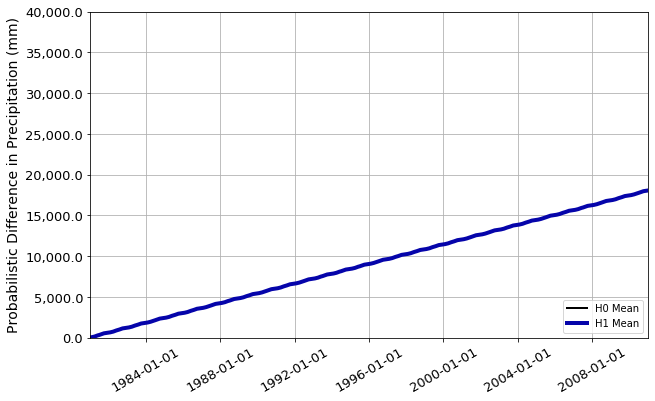

In [49]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H0PreStats1.index, H0PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=2, color='xkcd:black', label='H0 Mean' )
ax11.plot( H1PreStats1.index, H1PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=4, color='xkcd:royal blue', label='H1 Mean' )
ax11.set_xlim( (TP_DICT[1][0], TP_DICT[1][1]))
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Probabilistic Difference in Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

We have cumulative in each analysis period. Want to to make this a continuous line across all data periods

In [50]:
NumD1 = len( H0PreStats1 )
NumP1 = len( H0PreStats2 )
NumP2 = len( H0PreStats3 )
NumP3 = len( H0PreStats4 )
NumD1, NumP1, NumP2, NumP3

(360, 360, 360, 360)

In [51]:
IndexD1 = H0PreStats1.index[NumD1-1]
IndexP1 = H0PreStats2.index[NumP1-1]
IndexP2 = H0PreStats3.index[NumP2-1]
IndexP3 = H0PreStats4.index[NumP3-1]
IndexD1, IndexP1, IndexP2, IndexP3

(Timestamp('2010-12-01 00:00:00', freq='MS'),
 Timestamp('2040-12-01 00:00:00', freq='MS'),
 Timestamp('2070-12-01 00:00:00', freq='MS'),
 Timestamp('2100-12-01 00:00:00', freq='MS'))

In [52]:
H0PreD1AveTot = H0PreStats1.at[IndexD1, StatsHdsList[101]]
H0PreP1AveTot = H0PreStats2.at[IndexP1, StatsHdsList[101]] + H0PreD1AveTot
H0PreP2AveTot = H0PreStats3.at[IndexP2, StatsHdsList[101]] + H0PreP1AveTot
H0PreP3AveTot = H0PreStats4.at[IndexP3, StatsHdsList[101]] + H0PreP2AveTot
H0PreD1AveTot, H0PreP1AveTot, H0PreP2AveTot, H0PreP3AveTot 

(18031.245704608504, 36054.619566755064, 54082.17307079365, 72109.71862264648)

In [53]:
H0PreAllAve = H0PreStats1[[StatsHdsList[101]]].to_numpy()
H0PreAllAve = np.append( H0PreAllAve, 
                         H0PreStats2[[StatsHdsList[101]]].to_numpy() + H0PreD1AveTot )
H0PreAllAve = np.append( H0PreAllAve, 
                         H0PreStats3[[StatsHdsList[101]]].to_numpy() + H0PreP1AveTot )
H0PreAllAve = np.append( H0PreAllAve, 
                         H0PreStats4[[StatsHdsList[101]]].to_numpy() + H0PreP2AveTot )
len( H0PreAllAve )

1440

In [54]:
H1PreD1AveTot = H1PreStats1.at[IndexD1, StatsHdsList[101]]
H1PreP1AveTot = H1PreStats2.at[IndexP1, StatsHdsList[101]] + H1PreD1AveTot
H1PreP2AveTot = H1PreStats3.at[IndexP2, StatsHdsList[101]] + H1PreP1AveTot
H1PreP3AveTot = H1PreStats4.at[IndexP3, StatsHdsList[101]] + H1PreP2AveTot
H1PreD1AveTot, H1PreP1AveTot, H1PreP2AveTot, H1PreP3AveTot 

(18031.2440081906, 41995.30980397161, 65675.12007287805, 89244.70428741013)

In [55]:
H1PreAllAve = H1PreStats1[[StatsHdsList[101]]].to_numpy()
H1PreAllAve = np.append( H1PreAllAve, 
                         H1PreStats2[[StatsHdsList[101]]].to_numpy() + H1PreD1AveTot )
H1PreAllAve = np.append( H1PreAllAve, 
                         H1PreStats3[[StatsHdsList[101]]].to_numpy() + H1PreP1AveTot )
H1PreAllAve = np.append( H1PreAllAve, 
                         H1PreStats4[[StatsHdsList[101]]].to_numpy() + H1PreP2AveTot )
len( H1PreAllAve )

1440

Now need to do the 25th and 75th percentiles

In [56]:
H0PreD1P25Tot = H0PreStats1.at[IndexD1, StatsHdsList[25]]
H0PreP1P25Tot = H0PreStats2.at[IndexP1, StatsHdsList[25]] + H0PreD1P25Tot
H0PreP2P25Tot = H0PreStats3.at[IndexP2, StatsHdsList[25]] + H0PreP1P25Tot
H0PreP3P25Tot = H0PreStats4.at[IndexP3, StatsHdsList[25]] + H0PreP2P25Tot
H0PreD1P25Tot, H0PreP1P25Tot, H0PreP2P25Tot, H0PreP3P25Tot 

(17513.777809350442, 35011.980455611134, 52516.84575086774, 70023.03889872946)

In [57]:
H0PreD1P75Tot = H0PreStats1.at[IndexD1, StatsHdsList[75]]
H0PreP1P75Tot = H0PreStats2.at[IndexP1, StatsHdsList[75]] + H0PreD1P75Tot
H0PreP2P75Tot = H0PreStats3.at[IndexP2, StatsHdsList[75]] + H0PreP1P75Tot
H0PreP3P75Tot = H0PreStats4.at[IndexP3, StatsHdsList[75]] + H0PreP2P75Tot
H0PreD1P75Tot, H0PreP1P75Tot, H0PreP2P75Tot, H0PreP3P75Tot 

(18540.20337662478, 37076.459651398836, 55624.732986146475, 74164.2195037984)

In [58]:
H0PreAllP25 = H0PreStats1[[StatsHdsList[25]]].to_numpy()
H0PreAllP25 = np.append( H0PreAllP25, 
                         H0PreStats2[[StatsHdsList[25]]].to_numpy() + H0PreD1P25Tot )
H0PreAllP25 = np.append( H0PreAllP25, 
                         H0PreStats3[[StatsHdsList[25]]].to_numpy() + H0PreP1P25Tot )
H0PreAllP25 = np.append( H0PreAllP25, 
                         H0PreStats4[[StatsHdsList[25]]].to_numpy() + H0PreP2P25Tot )
len( H0PreAllP25 )

1440

In [59]:
H0PreAllP75 = H0PreStats1[[StatsHdsList[75]]].to_numpy()
H0PreAllP75 = np.append( H0PreAllP75, 
                         H0PreStats2[[StatsHdsList[75]]].to_numpy() + H0PreD1P75Tot )
H0PreAllP75 = np.append( H0PreAllP75, 
                         H0PreStats3[[StatsHdsList[75]]].to_numpy() + H0PreP1P75Tot )
H0PreAllP75 = np.append( H0PreAllP75, 
                         H0PreStats4[[StatsHdsList[75]]].to_numpy() + H0PreP2P75Tot )
len( H0PreAllP75 )

1440

In [60]:
H1PreD1P25Tot = H1PreStats1.at[IndexD1, StatsHdsList[25]]
H1PreP1P25Tot = H1PreStats2.at[IndexP1, StatsHdsList[25]] + H1PreD1P25Tot
H1PreP2P25Tot = H1PreStats3.at[IndexP2, StatsHdsList[25]] + H1PreP1P25Tot
H1PreP3P25Tot = H1PreStats4.at[IndexP3, StatsHdsList[25]] + H1PreP2P25Tot
H1PreD1P25Tot, H1PreP1P25Tot, H1PreP2P25Tot, H1PreP3P25Tot 

(17513.777809350442, 40823.21457430847, 63861.190711479416, 86758.07825597632)

In [61]:
H1PreD1P75Tot = H1PreStats1.at[IndexD1, StatsHdsList[75]]
H1PreP1P75Tot = H1PreStats2.at[IndexP1, StatsHdsList[75]] + H1PreD1P75Tot
H1PreP2P75Tot = H1PreStats3.at[IndexP2, StatsHdsList[75]] + H1PreP1P75Tot
H1PreP3P75Tot = H1PreStats4.at[IndexP3, StatsHdsList[75]] + H1PreP2P75Tot
H1PreD1P75Tot, H1PreP1P75Tot, H1PreP2P75Tot, H1PreP3P75Tot 

(18540.20337662478, 43147.867624355, 67452.61079021097, 91699.01344487809)

In [62]:
MinPrecip = 10000.0

In [63]:
MaxPrecip = 120000.0

In [64]:
H1PreAllP25 = H1PreStats1[[StatsHdsList[25]]].to_numpy()
H1PreAllP25 = np.append( H1PreAllP25, 
                         H1PreStats2[[StatsHdsList[25]]].to_numpy() + H1PreD1P25Tot )
H1PreAllP25 = np.append( H1PreAllP25, 
                         H1PreStats3[[StatsHdsList[25]]].to_numpy() + H1PreP1P25Tot )
H1PreAllP25 = np.append( H1PreAllP25, 
                         H1PreStats4[[StatsHdsList[25]]].to_numpy() + H1PreP2P25Tot )
len( H1PreAllP25 )

1440

In [65]:
H1PreAllP75 = H1PreStats1[[StatsHdsList[75]]].to_numpy()
H1PreAllP75 = np.append( H1PreAllP75, 
                         H1PreStats2[[StatsHdsList[75]]].to_numpy() + H1PreD1P75Tot )
H1PreAllP75 = np.append( H1PreAllP75, 
                         H1PreStats3[[StatsHdsList[75]]].to_numpy() + H1PreP1P75Tot )
H1PreAllP75 = np.append( H1PreAllP75, 
                         H1PreStats4[[StatsHdsList[75]]].to_numpy() + H1PreP2P75Tot )
len( H1PreAllP75 )

1440

In [66]:
H0FillValues = H0PreAllP25.tolist()
tmpList1 = H0PreAllP75.tolist()
tmpList2 = tmpList1[::-1]
H0FillValues.extend( tmpList2 )

In [67]:
H1FillValues = H1PreAllP25.tolist()
tmpList1 = H1PreAllP75.tolist()
tmpList2 = tmpList1[::-1]
H1FillValues.extend( tmpList2 )

In [68]:
FillIndex = list( H0PreStats1.index.to_pydatetime() )
FillIndex.extend( list(H0PreStats2.index.to_pydatetime() ) )
FillIndex.extend( list(H0PreStats3.index.to_pydatetime() ) )
FillIndex.extend( list(H0PreStats4.index.to_pydatetime() ) )
VPlotIndex = deepcopy( FillIndex )
tmpList1 = list(H0PreStats4.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
FillIndex.extend( tmpList2 )
tmpList1 = list(H0PreStats3.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
FillIndex.extend( tmpList2 )
tmpList1 = list(H0PreStats2.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
FillIndex.extend( tmpList2 )
tmpList1 = list(H0PreStats1.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
FillIndex.extend( tmpList2 )

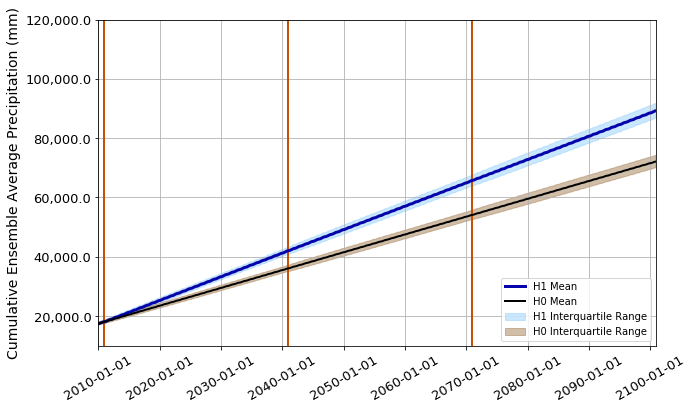

In [69]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.fill( FillIndex, H1FillValues, color="xkcd:light blue", alpha=0.5, 
           label="H1 Interquartile Range")
ax11.fill( FillIndex, H0FillValues, color="xkcd:puce", alpha=0.5, 
           label="H0 Interquartile Range")
ax11.plot( VPlotIndex, H1PreAllAve, linestyle='-',
           linewidth=3, color='xkcd:royal blue', label='H1 Mean' )
ax11.plot( VPlotIndex, H0PreAllAve, linestyle='-',
           linewidth=2, color='xkcd:black', label='H0 Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Cumulative Ensemble Average Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### PET

In [70]:
H0PETD1AveTot = H0PETStats1.at[IndexD1, StatsHdsList[101]]
H0PETP1AveTot = H0PETStats2.at[IndexP1, StatsHdsList[101]] + H0PETD1AveTot
H0PETP2AveTot = H0PETStats3.at[IndexP2, StatsHdsList[101]] + H0PETP1AveTot
H0PETP3AveTot = H0PETStats4.at[IndexP3, StatsHdsList[101]] + H0PETP2AveTot
H0PETD1AveTot, H0PETP1AveTot, H0PETP2AveTot, H0PETP3AveTot 

(38083.2477151684, 76164.99858561452, 114243.45122915189, 152321.24152493724)

In [71]:
H0PETAllAve = H0PETStats1[[StatsHdsList[101]]].to_numpy()
H0PETAllAve = np.append( H0PETAllAve, 
                         H0PETStats2[[StatsHdsList[101]]].to_numpy() + H0PETD1AveTot )
H0PETAllAve = np.append( H0PETAllAve, 
                         H0PETStats3[[StatsHdsList[101]]].to_numpy() + H0PETP1AveTot )
H0PETAllAve = np.append( H0PETAllAve, 
                         H0PETStats4[[StatsHdsList[101]]].to_numpy() + H0PETP2AveTot )
len( H0PETAllAve )

1440

In [72]:
H1PETD1AveTot = H1PETStats1.at[IndexD1, StatsHdsList[101]]
H1PETP1AveTot = H1PETStats2.at[IndexP1, StatsHdsList[101]] + H1PETD1AveTot
H1PETP2AveTot = H1PETStats3.at[IndexP2, StatsHdsList[101]] + H1PETP1AveTot
H1PETP3AveTot = H1PETStats4.at[IndexP3, StatsHdsList[101]] + H1PETP2AveTot
H1PETD1AveTot, H1PETP1AveTot, H1PETP2AveTot, H1PETP3AveTot 

(38083.24771457916, 75663.16263058875, 114655.11253793814, 155054.62122267147)

In [73]:
H1PETAllAve = H1PETStats1[[StatsHdsList[101]]].to_numpy()
H1PETAllAve = np.append( H1PETAllAve, 
                         H1PETStats2[[StatsHdsList[101]]].to_numpy() + H1PETD1AveTot )
H1PETAllAve = np.append( H1PETAllAve, 
                         H1PETStats3[[StatsHdsList[101]]].to_numpy() + H1PETP1AveTot )
H1PETAllAve = np.append( H1PETAllAve, 
                         H1PETStats4[[StatsHdsList[101]]].to_numpy() + H1PETP2AveTot )
len( H1PETAllAve )

1440

In [74]:
H0PETD1P25Tot = H0PETStats1.at[IndexD1, StatsHdsList[25]]
H0PETP1P25Tot = H0PETStats2.at[IndexP1, StatsHdsList[25]] + H0PETD1P25Tot
H0PETP2P25Tot = H0PETStats3.at[IndexP2, StatsHdsList[25]] + H0PETP1P25Tot
H0PETP3P25Tot = H0PETStats4.at[IndexP3, StatsHdsList[25]] + H0PETP2P25Tot
H0PETD1P25Tot, H0PETP1P25Tot, H0PETP2P25Tot, H0PETP3P25Tot 

(37919.18480686312, 75836.9480605567, 113753.58886323507, 151668.04859251538)

In [75]:
H0PETD1P75Tot = H0PETStats1.at[IndexD1, StatsHdsList[75]]
H0PETP1P75Tot = H0PETStats2.at[IndexP1, StatsHdsList[75]] + H0PETD1P75Tot
H0PETP2P75Tot = H0PETStats3.at[IndexP2, StatsHdsList[75]] + H0PETP1P75Tot
H0PETP3P75Tot = H0PETStats4.at[IndexP3, StatsHdsList[75]] + H0PETP2P75Tot
H0PETD1P75Tot, H0PETP1P75Tot, H0PETP2P75Tot, H0PETP3P75Tot 

(38249.55553812978, 76497.63713378977, 114736.15780219164, 152975.06736899714)

In [76]:
H0PETAllP25 = H0PETStats1[[StatsHdsList[25]]].to_numpy()
H0PETAllP25 = np.append( H0PETAllP25, 
                         H0PETStats2[[StatsHdsList[25]]].to_numpy() + H0PETD1P25Tot )
H0PETAllP25 = np.append( H0PETAllP25, 
                         H0PETStats3[[StatsHdsList[25]]].to_numpy() + H0PETP1P25Tot )
H0PETAllP25 = np.append( H0PETAllP25, 
                         H0PETStats4[[StatsHdsList[25]]].to_numpy() + H0PETP2P25Tot )
len( H0PETAllP25 )

1440

In [77]:
H0PETAllP75 = H0PETStats1[[StatsHdsList[75]]].to_numpy()
H0PETAllP75 = np.append( H0PETAllP75, 
                         H0PETStats2[[StatsHdsList[75]]].to_numpy() + H0PETD1P75Tot )
H0PETAllP75 = np.append( H0PETAllP75, 
                         H0PETStats3[[StatsHdsList[75]]].to_numpy() + H0PETP1P75Tot )
H0PETAllP75 = np.append( H0PETAllP75, 
                         H0PETStats4[[StatsHdsList[75]]].to_numpy() + H0PETP2P75Tot )
len( H0PETAllP75 )

1440

In [78]:
H1PETD1P25Tot = H1PETStats1.at[IndexD1, StatsHdsList[25]]
H1PETP1P25Tot = H1PETStats2.at[IndexP1, StatsHdsList[25]] + H1PETD1P25Tot
H1PETP2P25Tot = H1PETStats3.at[IndexP2, StatsHdsList[25]] + H1PETP1P25Tot
H1PETP3P25Tot = H1PETStats4.at[IndexP3, StatsHdsList[25]] + H1PETP2P25Tot
H1PETD1P25Tot, H1PETP1P25Tot, H1PETP2P25Tot, H1PETP3P25Tot 

(37919.18480686312, 75307.96550210388, 114104.94864018043, 154297.88055355902)

In [79]:
H1PETD1P75Tot = H1PETStats1.at[IndexD1, StatsHdsList[75]]
H1PETP1P75Tot = H1PETStats2.at[IndexP1, StatsHdsList[75]] + H1PETD1P75Tot
H1PETP2P75Tot = H1PETStats3.at[IndexP2, StatsHdsList[75]] + H1PETP1P75Tot
H1PETP3P75Tot = H1PETStats4.at[IndexP3, StatsHdsList[75]] + H1PETP2P75Tot
H1PETD1P75Tot, H1PETP1P75Tot, H1PETP2P75Tot, H1PETP3P75Tot 

(38249.55553812978, 76021.8425817327, 115209.11272637494, 155813.86849177448)

In [80]:
MaxPET = 160000

In [81]:
MinPET = 30000

In [82]:
H1PETAllP25 = H1PETStats1[[StatsHdsList[25]]].to_numpy()
H1PETAllP25 = np.append( H1PETAllP25, 
                         H1PETStats2[[StatsHdsList[25]]].to_numpy() + H1PETD1P25Tot )
H1PETAllP25 = np.append( H1PETAllP25, 
                         H1PETStats3[[StatsHdsList[25]]].to_numpy() + H1PETP1P25Tot )
H1PETAllP25 = np.append( H1PETAllP25, 
                         H1PETStats4[[StatsHdsList[25]]].to_numpy() + H1PETP2P25Tot )
len( H1PETAllP25 )

1440

In [83]:
H1PETAllP75 = H1PETStats1[[StatsHdsList[75]]].to_numpy()
H1PETAllP75 = np.append( H1PETAllP75, 
                         H1PETStats2[[StatsHdsList[75]]].to_numpy() + H1PETD1P75Tot )
H1PETAllP75 = np.append( H1PETAllP75, 
                         H1PETStats3[[StatsHdsList[75]]].to_numpy() + H1PETP1P75Tot )
H1PETAllP75 = np.append( H1PETAllP75, 
                         H1PETStats4[[StatsHdsList[75]]].to_numpy() + H1PETP2P75Tot )
len( H1PETAllP75 )

1440

In [84]:
H0FPETValues = H0PETAllP25.tolist()
tmpList1 = H0PETAllP75.tolist()
tmpList2 = tmpList1[::-1]
H0FPETValues.extend( tmpList2 )

In [85]:
H1FPETValues = H1PETAllP25.tolist()
tmpList1 = H1PETAllP75.tolist()
tmpList2 = tmpList1[::-1]
H1FPETValues.extend( tmpList2 )

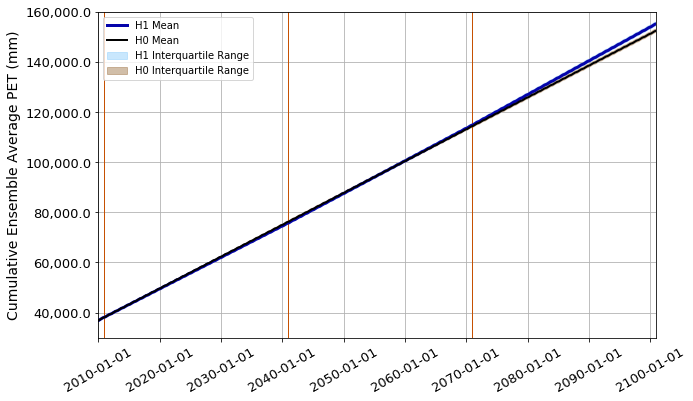

In [86]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=1, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=1, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=1, color='xkcd:dark orange' )
ax11.fill( FillIndex, H1FPETValues, color="xkcd:light blue", alpha=0.5, 
           label="H1 Interquartile Range")
ax11.fill( FillIndex, H0FPETValues, color="xkcd:puce", alpha=0.5, 
           label="H0 Interquartile Range")
ax11.plot( VPlotIndex, H1PETAllAve, linestyle='-',
           linewidth=3, color='xkcd:royal blue', label='H1 Mean' )
ax11.plot( VPlotIndex, H0PETAllAve, linestyle='-',
           linewidth=2, color='xkcd:black', label='H0 Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinPET, MaxPET) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Cumulative Ensemble Average PET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### AET

In [87]:
H0AETD1AveTot = H0AETStats1.at[IndexD1, StatsHdsList[101]]
H0AETP1AveTot = H0AETStats2.at[IndexP1, StatsHdsList[101]] + H0AETD1AveTot
H0AETP2AveTot = H0AETStats3.at[IndexP2, StatsHdsList[101]] + H0AETP1AveTot
H0AETP3AveTot = H0AETStats4.at[IndexP3, StatsHdsList[101]] + H0AETP2AveTot
H0AETD1AveTot, H0AETP1AveTot, H0AETP2AveTot, H0AETP3AveTot 

(16889.56651257734, 33775.51680921228, 50664.25487759498, 67552.36283576107)

In [88]:
H0AETAllAve = H0AETStats1[[StatsHdsList[101]]].to_numpy()
H0AETAllAve = np.append( H0AETAllAve, 
                         H0AETStats2[[StatsHdsList[101]]].to_numpy() + H0AETD1AveTot )
H0AETAllAve = np.append( H0AETAllAve, 
                         H0AETStats3[[StatsHdsList[101]]].to_numpy() + H0AETP1AveTot )
H0AETAllAve = np.append( H0AETAllAve, 
                         H0AETStats4[[StatsHdsList[101]]].to_numpy() + H0AETP2AveTot )
len( H0AETAllAve )

1440

In [89]:
H1AETD1AveTot = H1AETStats1.at[IndexD1, StatsHdsList[101]]
H1AETP1AveTot = H1AETStats2.at[IndexP1, StatsHdsList[101]] + H1AETD1AveTot
H1AETP2AveTot = H1AETStats3.at[IndexP2, StatsHdsList[101]] + H1AETP1AveTot
H1AETP3AveTot = H1AETStats4.at[IndexP3, StatsHdsList[101]] + H1AETP2AveTot
H1AETD1AveTot, H1AETP1AveTot, H1AETP2AveTot, H1AETP3AveTot 

(16889.56481614204, 37829.84383201934, 58726.078821294825, 79483.69716910881)

In [90]:
H1AETAllAve = H1AETStats1[[StatsHdsList[101]]].to_numpy()
H1AETAllAve = np.append( H1AETAllAve, 
                         H1AETStats2[[StatsHdsList[101]]].to_numpy() + H1AETD1AveTot )
H1AETAllAve = np.append( H1AETAllAve, 
                         H1AETStats3[[StatsHdsList[101]]].to_numpy() + H1AETP1AveTot )
H1AETAllAve = np.append( H1AETAllAve, 
                         H1AETStats4[[StatsHdsList[101]]].to_numpy() + H1AETP2AveTot )
len( H1AETAllAve )

1440

In [91]:
H0AETD1P25Tot = H0AETStats1.at[IndexD1, StatsHdsList[25]]
H0AETP1P25Tot = H0AETStats2.at[IndexP1, StatsHdsList[25]] + H0AETD1P25Tot
H0AETP2P25Tot = H0AETStats3.at[IndexP2, StatsHdsList[25]] + H0AETP1P25Tot
H0AETP3P25Tot = H0AETStats4.at[IndexP3, StatsHdsList[25]] + H0AETP2P25Tot
H0AETD1P25Tot, H0AETP1P25Tot, H0AETP2P25Tot, H0AETP3P25Tot 

(16467.82040450681, 32949.31643498893, 49434.13052498824, 65909.40260519629)

In [92]:
H0AETD1P75Tot = H0AETStats1.at[IndexD1, StatsHdsList[75]]
H0AETP1P75Tot = H0AETStats2.at[IndexP1, StatsHdsList[75]] + H0AETD1P75Tot
H0AETP2P75Tot = H0AETStats3.at[IndexP2, StatsHdsList[75]] + H0AETP1P75Tot
H0AETP3P75Tot = H0AETStats4.at[IndexP3, StatsHdsList[75]] + H0AETP2P75Tot
H0AETD1P75Tot, H0AETP1P75Tot, H0AETP2P75Tot, H0AETP3P75Tot 

(17304.000964651997, 34602.0538011073, 51894.920933044166, 69190.65672406185)

In [93]:
H0AETAllP25 = H0AETStats1[[StatsHdsList[25]]].to_numpy()
H0AETAllP25 = np.append( H0AETAllP25, 
                         H0AETStats2[[StatsHdsList[25]]].to_numpy() + H0AETD1P25Tot )
H0AETAllP25 = np.append( H0AETAllP25, 
                         H0AETStats3[[StatsHdsList[25]]].to_numpy() + H0AETP1P25Tot )
H0AETAllP25 = np.append( H0AETAllP25, 
                         H0AETStats4[[StatsHdsList[25]]].to_numpy() + H0AETP2P25Tot )
len( H0AETAllP25 )

1440

In [94]:
H0AETAllP75 = H0AETStats1[[StatsHdsList[75]]].to_numpy()
H0AETAllP75 = np.append( H0AETAllP75, 
                         H0AETStats2[[StatsHdsList[75]]].to_numpy() + H0AETD1P75Tot )
H0AETAllP75 = np.append( H0AETAllP75, 
                         H0AETStats3[[StatsHdsList[75]]].to_numpy() + H0AETP1P75Tot )
H0AETAllP75 = np.append( H0AETAllP75, 
                         H0AETStats4[[StatsHdsList[75]]].to_numpy() + H0AETP2P75Tot )
len( H0AETAllP75 )

1440

In [95]:
H1AETD1P25Tot = H1AETStats1.at[IndexD1, StatsHdsList[25]]
H1AETP1P25Tot = H1AETStats2.at[IndexP1, StatsHdsList[25]] + H1AETD1P25Tot
H1AETP2P25Tot = H1AETStats3.at[IndexP2, StatsHdsList[25]] + H1AETP1P25Tot
H1AETP3P25Tot = H1AETStats4.at[IndexP3, StatsHdsList[25]] + H1AETP2P25Tot
H1AETD1P25Tot, H1AETP1P25Tot, H1AETP2P25Tot, H1AETP3P25Tot 

(16467.82040450681, 36988.57197596851, 57455.04022653414, 77766.65068085169)

In [96]:
H1AETD1P75Tot = H1AETStats1.at[IndexD1, StatsHdsList[75]]
H1AETP1P75Tot = H1AETStats2.at[IndexP1, StatsHdsList[75]] + H1AETD1P75Tot
H1AETP2P75Tot = H1AETStats3.at[IndexP2, StatsHdsList[75]] + H1AETP1P75Tot
H1AETP3P75Tot = H1AETStats4.at[IndexP3, StatsHdsList[75]] + H1AETP2P75Tot
H1AETD1P75Tot, H1AETP1P75Tot, H1AETP2P75Tot, H1AETP3P75Tot 

(17304.000964651997, 38675.0199510453, 60008.007660285846, 81217.13522872626)

In [97]:
MaxAET = 100000

In [98]:
MinAET = 10000

In [99]:
H1AETAllP25 = H1AETStats1[[StatsHdsList[25]]].to_numpy()
H1AETAllP25 = np.append( H1AETAllP25, 
                         H1AETStats2[[StatsHdsList[25]]].to_numpy() + H1AETD1P25Tot )
H1AETAllP25 = np.append( H1AETAllP25, 
                         H1AETStats3[[StatsHdsList[25]]].to_numpy() + H1AETP1P25Tot )
H1AETAllP25 = np.append( H1AETAllP25, 
                         H1AETStats4[[StatsHdsList[25]]].to_numpy() + H1AETP2P25Tot )
len( H1AETAllP25 )

1440

In [100]:
H1AETAllP75 = H1AETStats1[[StatsHdsList[75]]].to_numpy()
H1AETAllP75 = np.append( H1AETAllP75, 
                         H1AETStats2[[StatsHdsList[75]]].to_numpy() + H1AETD1P75Tot )
H1AETAllP75 = np.append( H1AETAllP75, 
                         H1AETStats3[[StatsHdsList[75]]].to_numpy() + H1AETP1P75Tot )
H1AETAllP75 = np.append( H1AETAllP75, 
                         H1AETStats4[[StatsHdsList[75]]].to_numpy() + H1AETP2P75Tot )
len( H1AETAllP75 )

1440

In [101]:
H0FAETValues = H0AETAllP25.tolist()
tmpList1 = H0AETAllP75.tolist()
tmpList2 = tmpList1[::-1]
H0FAETValues.extend( tmpList2 )

In [102]:
H1FAETValues = H1AETAllP25.tolist()
tmpList1 = H1AETAllP75.tolist()
tmpList2 = tmpList1[::-1]
H1FAETValues.extend( tmpList2 )

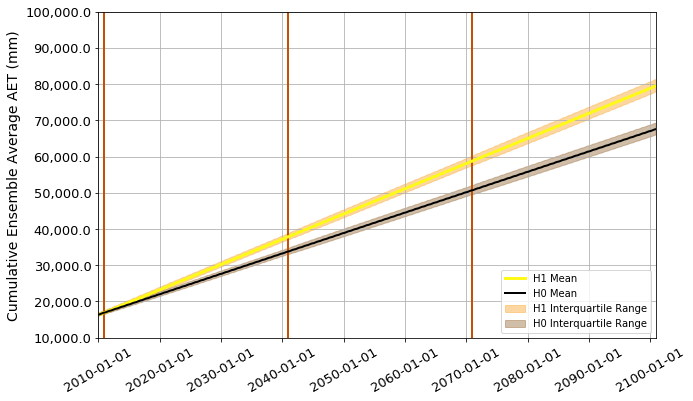

In [103]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.fill( FillIndex, H1FAETValues, color="xkcd:butterscotch", alpha=0.5, 
           label="H1 Interquartile Range")
ax11.fill( FillIndex, H0FAETValues, color="xkcd:puce", alpha=0.5, 
           label="H0 Interquartile Range")
ax11.plot( VPlotIndex, H1AETAllAve, linestyle='-',
           linewidth=3, color='xkcd:sunny yellow', label='H1 Mean' )
ax11.plot( VPlotIndex, H0AETAllAve, linestyle='-',
           linewidth=2, color='xkcd:black', label='H0 Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Cumulative Ensemble Average AET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Runoff (RO)

In [104]:
H0ROD1AveTot = H0ROStats1.at[IndexD1, StatsHdsList[101]]
H0ROP1AveTot = H0ROStats2.at[IndexP1, StatsHdsList[101]] + H0ROD1AveTot
H0ROP2AveTot = H0ROStats3.at[IndexP2, StatsHdsList[101]] + H0ROP1AveTot
H0ROP3AveTot = H0ROStats4.at[IndexP3, StatsHdsList[101]] + H0ROP2AveTot
H0ROD1AveTot, H0ROP1AveTot, H0ROP2AveTot, H0ROP3AveTot 

(609.1047433428791, 1245.6242246734555, 1882.6515125547962, 2520.5830827835616)

In [105]:
H0ROAllAve = H0ROStats1[[StatsHdsList[101]]].to_numpy()
H0ROAllAve = np.append( H0ROAllAve, 
                         H0ROStats2[[StatsHdsList[101]]].to_numpy() + H0ROD1AveTot )
H0ROAllAve = np.append( H0ROAllAve, 
                         H0ROStats3[[StatsHdsList[101]]].to_numpy() + H0ROP1AveTot )
H0ROAllAve = np.append( H0ROAllAve, 
                         H0ROStats4[[StatsHdsList[101]]].to_numpy() + H0ROP2AveTot )
len( H0ROAllAve )

1440

In [106]:
H1ROD1AveTot = H1ROStats1.at[IndexD1, StatsHdsList[101]]
H1ROP1AveTot = H1ROStats2.at[IndexP1, StatsHdsList[101]] + H1ROD1AveTot
H1ROP2AveTot = H1ROStats3.at[IndexP2, StatsHdsList[101]] + H1ROP1AveTot
H1ROP3AveTot = H1ROStats4.at[IndexP3, StatsHdsList[101]] + H1ROP2AveTot
H1ROD1AveTot, H1ROP1AveTot, H1ROP2AveTot, H1ROP3AveTot 

(609.1047433428791, 2091.160316719971, 3503.871214653983, 4910.219922028527)

In [107]:
H1ROAllAve = H1ROStats1[[StatsHdsList[101]]].to_numpy()
H1ROAllAve = np.append( H1ROAllAve, 
                         H1ROStats2[[StatsHdsList[101]]].to_numpy() + H1ROD1AveTot )
H1ROAllAve = np.append( H1ROAllAve, 
                         H1ROStats3[[StatsHdsList[101]]].to_numpy() + H1ROP1AveTot )
H1ROAllAve = np.append( H1ROAllAve, 
                         H1ROStats4[[StatsHdsList[101]]].to_numpy() + H1ROP2AveTot )
len( H1ROAllAve )

1440

In [108]:
H0ROD1P25Tot = H0ROStats1.at[IndexD1, StatsHdsList[25]]
H0ROP1P25Tot = H0ROStats2.at[IndexP1, StatsHdsList[25]] + H0ROD1P25Tot
H0ROP2P25Tot = H0ROStats3.at[IndexP2, StatsHdsList[25]] + H0ROP1P25Tot
H0ROP3P25Tot = H0ROStats4.at[IndexP3, StatsHdsList[25]] + H0ROP2P25Tot
H0ROD1P25Tot, H0ROP1P25Tot, H0ROP2P25Tot, H0ROP3P25Tot 

(512.2390201511492, 1051.2384254341432, 1591.9949544640886, 2133.4518556094986)

In [109]:
H0ROD1P75Tot = H0ROStats1.at[IndexD1, StatsHdsList[75]]
H0ROP1P75Tot = H0ROStats2.at[IndexP1, StatsHdsList[75]] + H0ROD1P75Tot
H0ROP2P75Tot = H0ROStats3.at[IndexP2, StatsHdsList[75]] + H0ROP1P75Tot
H0ROP3P75Tot = H0ROStats4.at[IndexP3, StatsHdsList[75]] + H0ROP2P75Tot
H0ROD1P75Tot, H0ROP1P75Tot, H0ROP2P75Tot, H0ROP3P75Tot 

(697.5876852883082, 1424.589673230427, 2151.009324026769, 2878.1147345788245)

In [110]:
H0ROAllP25 = H0ROStats1[[StatsHdsList[25]]].to_numpy()
H0ROAllP25 = np.append( H0ROAllP25, 
                         H0ROStats2[[StatsHdsList[25]]].to_numpy() + H0ROD1P25Tot )
H0ROAllP25 = np.append( H0ROAllP25, 
                         H0ROStats3[[StatsHdsList[25]]].to_numpy() + H0ROP1P25Tot )
H0ROAllP25 = np.append( H0ROAllP25, 
                         H0ROStats4[[StatsHdsList[25]]].to_numpy() + H0ROP2P25Tot )
len( H0ROAllP25 )

1440

In [111]:
H0ROAllP75 = H0ROStats1[[StatsHdsList[75]]].to_numpy()
H0ROAllP75 = np.append( H0ROAllP75, 
                         H0ROStats2[[StatsHdsList[75]]].to_numpy() + H0ROD1P75Tot )
H0ROAllP75 = np.append( H0ROAllP75, 
                         H0ROStats3[[StatsHdsList[75]]].to_numpy() + H0ROP1P75Tot )
H0ROAllP75 = np.append( H0ROAllP75, 
                         H0ROStats4[[StatsHdsList[75]]].to_numpy() + H0ROP2P75Tot )
len( H0ROAllP75 )

1440

In [112]:
H1ROD1P25Tot = H1ROStats1.at[IndexD1, StatsHdsList[25]]
H1ROP1P25Tot = H1ROStats2.at[IndexP1, StatsHdsList[25]] + H1ROD1P25Tot
H1ROP2P25Tot = H1ROStats3.at[IndexP2, StatsHdsList[25]] + H1ROP1P25Tot
H1ROP3P25Tot = H1ROStats4.at[IndexP3, StatsHdsList[25]] + H1ROP2P25Tot
H1ROD1P25Tot, H1ROP1P25Tot, H1ROP2P25Tot, H1ROP3P25Tot 

(512.2390201511492, 1839.0029860344089, 3098.261841420682, 4348.163686180749)

In [113]:
H1ROD1P75Tot = H1ROStats1.at[IndexD1, StatsHdsList[75]]
H1ROP1P75Tot = H1ROStats2.at[IndexP1, StatsHdsList[75]] + H1ROD1P75Tot
H1ROP2P75Tot = H1ROStats3.at[IndexP2, StatsHdsList[75]] + H1ROP1P75Tot
H1ROP3P75Tot = H1ROStats4.at[IndexP3, StatsHdsList[75]] + H1ROP2P75Tot
H1ROD1P75Tot, H1ROP1P75Tot, H1ROP2P75Tot, H1ROP3P75Tot 

(697.5876852883082, 2324.8650308789256, 3884.9052799926303, 5441.746716471601)

In [114]:
MaxRO = 12000

In [115]:
MinRO = 0.0

In [116]:
H1ROAllP25 = H1ROStats1[[StatsHdsList[25]]].to_numpy()
H1ROAllP25 = np.append( H1ROAllP25, 
                         H1ROStats2[[StatsHdsList[25]]].to_numpy() + H1ROD1P25Tot )
H1ROAllP25 = np.append( H1ROAllP25, 
                         H1ROStats3[[StatsHdsList[25]]].to_numpy() + H1ROP1P25Tot )
H1ROAllP25 = np.append( H1ROAllP25, 
                         H1ROStats4[[StatsHdsList[25]]].to_numpy() + H1ROP2P25Tot )
len( H1ROAllP25 )

1440

In [117]:
H1ROAllP75 = H1ROStats1[[StatsHdsList[75]]].to_numpy()
H1ROAllP75 = np.append( H1ROAllP75, 
                         H1ROStats2[[StatsHdsList[75]]].to_numpy() + H1ROD1P75Tot )
H1ROAllP75 = np.append( H1ROAllP75, 
                         H1ROStats3[[StatsHdsList[75]]].to_numpy() + H1ROP1P75Tot )
H1ROAllP75 = np.append( H1ROAllP75, 
                         H1ROStats4[[StatsHdsList[75]]].to_numpy() + H1ROP2P75Tot )
len( H1ROAllP75 )

1440

In [118]:
H0FROValues = H0ROAllP25.tolist()
tmpList1 = H0ROAllP75.tolist()
tmpList2 = tmpList1[::-1]
H0FROValues.extend( tmpList2 )

In [119]:
H1FROValues = H1ROAllP25.tolist()
tmpList1 = H1ROAllP75.tolist()
tmpList2 = tmpList1[::-1]
H1FROValues.extend( tmpList2 )

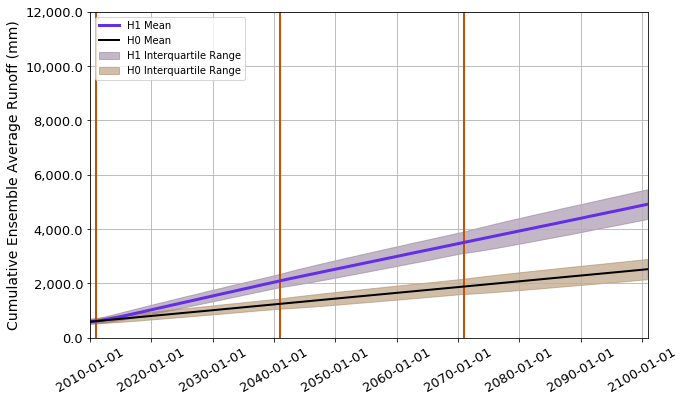

In [120]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.fill( FillIndex, H1FROValues, color="xkcd:greyish purple", alpha=0.5, 
           label="H1 Interquartile Range")
ax11.fill( FillIndex, H0FROValues, color="xkcd:puce", alpha=0.5, 
           label="H0 Interquartile Range")
ax11.plot( VPlotIndex, H1ROAllAve, linestyle='-',
           linewidth=3, color='xkcd:purple blue', label='H1 Mean' )
ax11.plot( VPlotIndex, H0ROAllAve, linestyle='-',
           linewidth=2, color='xkcd:black', label='H0 Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Cumulative Ensemble Average Runoff (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Recharge (RE)

In [121]:
H0RED1AveTot = H0REStats1.at[IndexD1, StatsHdsList[101]]
H0REP1AveTot = H0REStats2.at[IndexP1, StatsHdsList[101]] + H0RED1AveTot
H0REP2AveTot = H0REStats3.at[IndexP2, StatsHdsList[101]] + H0REP1AveTot
H0REP3AveTot = H0REStats4.at[IndexP3, StatsHdsList[101]] + H0REP2AveTot
H0RED1AveTot, H0REP1AveTot, H0REP2AveTot, H0REP3AveTot 

(902.6932296341467, 1846.0151009660622, 2790.089541606212, 3735.50412868524)

In [122]:
H0REAllAve = H0REStats1[[StatsHdsList[101]]].to_numpy()
H0REAllAve = np.append( H0REAllAve, 
                         H0REStats2[[StatsHdsList[101]]].to_numpy() + H0RED1AveTot )
H0REAllAve = np.append( H0REAllAve, 
                         H0REStats3[[StatsHdsList[101]]].to_numpy() + H0REP1AveTot )
H0REAllAve = np.append( H0REAllAve, 
                         H0REStats4[[StatsHdsList[101]]].to_numpy() + H0REP2AveTot )
len( H0REAllAve )

1440

In [123]:
H1RED1AveTot = H1REStats1.at[IndexD1, StatsHdsList[101]]
H1REP1AveTot = H1REStats2.at[IndexP1, StatsHdsList[101]] + H1RED1AveTot
H1REP2AveTot = H1REStats3.at[IndexP2, StatsHdsList[101]] + H1REP1AveTot
H1REP3AveTot = H1REStats4.at[IndexP3, StatsHdsList[101]] + H1REP2AveTot
H1RED1AveTot, H1REP1AveTot, H1REP2AveTot, H1REP3AveTot 

(902.6932296341467, 3099.099589378996, 5192.737140117206, 7276.945924446298)

In [124]:
H1REAllAve = H1REStats1[[StatsHdsList[101]]].to_numpy()
H1REAllAve = np.append( H1REAllAve, 
                         H1REStats2[[StatsHdsList[101]]].to_numpy() + H1RED1AveTot )
H1REAllAve = np.append( H1REAllAve, 
                         H1REStats3[[StatsHdsList[101]]].to_numpy() + H1REP1AveTot )
H1REAllAve = np.append( H1REAllAve, 
                         H1REStats4[[StatsHdsList[101]]].to_numpy() + H1REP2AveTot )
len( H1REAllAve )

1440

In [125]:
H0RED1P25Tot = H0REStats1.at[IndexD1, StatsHdsList[25]]
H0REP1P25Tot = H0REStats2.at[IndexP1, StatsHdsList[25]] + H0RED1P25Tot
H0REP2P25Tot = H0REStats3.at[IndexP2, StatsHdsList[25]] + H0REP1P25Tot
H0REP3P25Tot = H0REStats4.at[IndexP3, StatsHdsList[25]] + H0REP2P25Tot
H0RED1P25Tot, H0REP1P25Tot, H0REP2P25Tot, H0REP3P25Tot 

(759.1382278640034, 1557.9353464934002, 2359.3365225157786, 3161.775650013276)

In [126]:
H0RED1P75Tot = H0REStats1.at[IndexD1, StatsHdsList[75]]
H0REP1P75Tot = H0REStats2.at[IndexP1, StatsHdsList[75]] + H0RED1P75Tot
H0REP2P75Tot = H0REStats3.at[IndexP2, StatsHdsList[75]] + H0REP1P75Tot
H0REP3P75Tot = H0REStats4.at[IndexP3, StatsHdsList[75]] + H0REP2P75Tot
H0RED1P75Tot, H0REP1P75Tot, H0REP2P75Tot, H0REP3P75Tot 

(1033.8249495972723, 2111.241895727492, 3187.795818207671, 4265.366036645818)

In [127]:
H0REAllP25 = H0REStats1[[StatsHdsList[25]]].to_numpy()
H0REAllP25 = np.append( H0REAllP25, 
                         H0REStats2[[StatsHdsList[25]]].to_numpy() + H0RED1P25Tot )
H0REAllP25 = np.append( H0REAllP25, 
                         H0REStats3[[StatsHdsList[25]]].to_numpy() + H0REP1P25Tot )
H0REAllP25 = np.append( H0REAllP25, 
                         H0REStats4[[StatsHdsList[25]]].to_numpy() + H0REP2P25Tot )
len( H0REAllP25 )

1440

In [128]:
H0REAllP75 = H0REStats1[[StatsHdsList[75]]].to_numpy()
H0REAllP75 = np.append( H0REAllP75, 
                         H0REStats2[[StatsHdsList[75]]].to_numpy() + H0RED1P75Tot )
H0REAllP75 = np.append( H0REAllP75, 
                         H0REStats3[[StatsHdsList[75]]].to_numpy() + H0REP1P75Tot )
H0REAllP75 = np.append( H0REAllP75, 
                         H0REStats4[[StatsHdsList[75]]].to_numpy() + H0REP2P75Tot )
len( H0REAllP75 )

1440

In [129]:
H1RED1P25Tot = H1REStats1.at[IndexD1, StatsHdsList[25]]
H1REP1P25Tot = H1REStats2.at[IndexP1, StatsHdsList[25]] + H1RED1P25Tot
H1REP2P25Tot = H1REStats3.at[IndexP2, StatsHdsList[25]] + H1REP1P25Tot
H1REP3P25Tot = H1REStats4.at[IndexP3, StatsHdsList[25]] + H1REP2P25Tot
H1RED1P25Tot, H1REP1P25Tot, H1REP2P25Tot, H1REP3P25Tot 

(759.1382278640034, 2725.4024253029947, 4591.624048985449, 6443.97858291987)

In [130]:
H1RED1P75Tot = H1REStats1.at[IndexD1, StatsHdsList[75]]
H1REP1P75Tot = H1REStats2.at[IndexP1, StatsHdsList[75]] + H1RED1P75Tot
H1REP2P75Tot = H1REStats3.at[IndexP2, StatsHdsList[75]] + H1REP1P75Tot
H1REP3P75Tot = H1REStats4.at[IndexP3, StatsHdsList[75]] + H1REP2P75Tot
H1RED1P75Tot, H1REP1P75Tot, H1REP2P75Tot, H1REP3P75Tot 

(1033.8249495972723, 3445.4499757625676, 5757.429624949074, 8064.6686338109075)

In [131]:
MaxRE = 20000

In [132]:
MinRE = 0.0

In [133]:
H1REAllP25 = H1REStats1[[StatsHdsList[25]]].to_numpy()
H1REAllP25 = np.append( H1REAllP25, 
                         H1REStats2[[StatsHdsList[25]]].to_numpy() + H1RED1P25Tot )
H1REAllP25 = np.append( H1REAllP25, 
                         H1REStats3[[StatsHdsList[25]]].to_numpy() + H1REP1P25Tot )
H1REAllP25 = np.append( H1REAllP25, 
                         H1REStats4[[StatsHdsList[25]]].to_numpy() + H1REP2P25Tot )
len( H1REAllP25 )

1440

In [134]:
H1REAllP75 = H1REStats1[[StatsHdsList[75]]].to_numpy()
H1REAllP75 = np.append( H1REAllP75, 
                         H1REStats2[[StatsHdsList[75]]].to_numpy() + H1RED1P75Tot )
H1REAllP75 = np.append( H1REAllP75, 
                         H1REStats3[[StatsHdsList[75]]].to_numpy() + H1REP1P75Tot )
H1REAllP75 = np.append( H1REAllP75, 
                         H1REStats4[[StatsHdsList[75]]].to_numpy() + H1REP2P75Tot )
len( H1REAllP75 )

1440

In [135]:
H0FREValues = H0REAllP25.tolist()
tmpList1 = H0REAllP75.tolist()
tmpList2 = tmpList1[::-1]
H0FREValues.extend( tmpList2 )

In [136]:
H1FREValues = H1REAllP25.tolist()
tmpList1 = H1REAllP75.tolist()
tmpList2 = tmpList1[::-1]
H1FREValues.extend( tmpList2 )

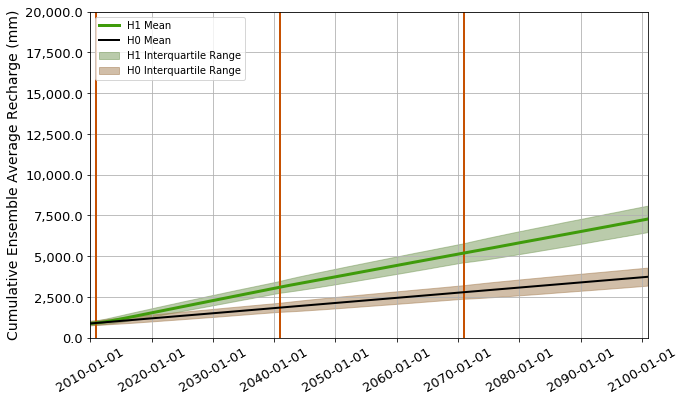

In [137]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.fill( FillIndex, H1FREValues, color="xkcd:moss", alpha=0.5, 
           label="H1 Interquartile Range")
ax11.fill( FillIndex, H0FREValues, color="xkcd:puce", alpha=0.5, 
           label="H0 Interquartile Range")
ax11.plot( VPlotIndex, H1REAllAve, linestyle='-',
           linewidth=3, color='xkcd:grass green', label='H1 Mean' )
ax11.plot( VPlotIndex, H0REAllAve, linestyle='-',
           linewidth=2, color='xkcd:black', label='H0 Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Cumulative Ensemble Average Recharge (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

## Pie Charts of Water Budget

In [138]:
H0PreD1AveEnd = H0PreStats1.at[IndexD1, StatsHdsList[101]]
H0PreP1AveEnd = H0PreStats2.at[IndexP1, StatsHdsList[101]]
H0PreP2AveEnd = H0PreStats3.at[IndexP2, StatsHdsList[101]]
H0PreP3AveEnd = H0PreStats4.at[IndexP3, StatsHdsList[101]]
H1PreD1AveEnd = H1PreStats1.at[IndexD1, StatsHdsList[101]]
H1PreP1AveEnd = H1PreStats2.at[IndexP1, StatsHdsList[101]]
H1PreP2AveEnd = H1PreStats3.at[IndexP2, StatsHdsList[101]]
H1PreP3AveEnd = H1PreStats4.at[IndexP3, StatsHdsList[101]]

In [139]:
H0AETD1AveEnd = H0AETStats1.at[IndexD1, StatsHdsList[101]]
H0AETP1AveEnd = H0AETStats2.at[IndexP1, StatsHdsList[101]]
H0AETP2AveEnd = H0AETStats3.at[IndexP2, StatsHdsList[101]]
H0AETP3AveEnd = H0AETStats4.at[IndexP3, StatsHdsList[101]]
H1AETD1AveEnd = H1AETStats1.at[IndexD1, StatsHdsList[101]]
H1AETP1AveEnd = H1AETStats2.at[IndexP1, StatsHdsList[101]]
H1AETP2AveEnd = H1AETStats3.at[IndexP2, StatsHdsList[101]]
H1AETP3AveEnd = H1AETStats4.at[IndexP3, StatsHdsList[101]]

In [140]:
H0ROD1AveEnd = H0ROStats1.at[IndexD1, StatsHdsList[101]]
H0ROP1AveEnd = H0ROStats2.at[IndexP1, StatsHdsList[101]]
H0ROP2AveEnd = H0ROStats3.at[IndexP2, StatsHdsList[101]]
H0ROP3AveEnd = H0ROStats4.at[IndexP3, StatsHdsList[101]]
H1ROD1AveEnd = H1ROStats1.at[IndexD1, StatsHdsList[101]]
H1ROP1AveEnd = H1ROStats2.at[IndexP1, StatsHdsList[101]]
H1ROP2AveEnd = H1ROStats3.at[IndexP2, StatsHdsList[101]]
H1ROP3AveEnd = H1ROStats4.at[IndexP3, StatsHdsList[101]]

In [141]:
H0RED1AveEnd = H0REStats1.at[IndexD1, StatsHdsList[101]]
H0REP1AveEnd = H0REStats2.at[IndexP1, StatsHdsList[101]]
H0REP2AveEnd = H0REStats3.at[IndexP2, StatsHdsList[101]]
H0REP3AveEnd = H0REStats4.at[IndexP3, StatsHdsList[101]]
H1RED1AveEnd = H1REStats1.at[IndexD1, StatsHdsList[101]]
H1REP1AveEnd = H1REStats2.at[IndexP1, StatsHdsList[101]]
H1REP2AveEnd = H1REStats3.at[IndexP2, StatsHdsList[101]]
H1REP3AveEnd = H1REStats4.at[IndexP3, StatsHdsList[101]]

In [142]:
PieHdrs = ["AET", "Runoff", "Recharge" ]

### H0

#### Data Period: 1981-2010

In [143]:
H0PreD1AveEnd, H0AETD1AveEnd, H0ROD1AveEnd, H0RED1AveEnd

(18031.245704608504, 16889.56651257734, 609.1047433428791, 902.6932296341467)

In [144]:
H0DstoD1AveEnd = H0PreD1AveEnd - ( H0AETD1AveEnd + H0ROD1AveEnd + H0RED1AveEnd )
H0DstoD1AveEnd

-370.1187809458643

If change in storage is negative, then reduce AET

In [145]:
H0AETD1AveEnd =  H0AETD1AveEnd + H0DstoD1AveEnd

In [146]:
H0PreD1AveEnd, H0AETD1AveEnd, H0ROD1AveEnd, H0RED1AveEnd

(18031.245704608504, 16519.447731631477, 609.1047433428791, 902.6932296341467)

([<matplotlib.patches.Wedge at 0x1d59ea2d8c8>,
 [Text(-0.28640282157728114, -1.0620609322409766, 'AET'),
  Text(0.4492177045202035, 1.0040933492188857, 'Runoff'),
  Text(0.1722923904352971, 1.0864231828335087, 'Recharge')],
 [Text(-0.15621972086033517, -0.5793059630405326, '91.6%'),
  Text(0.24502783882920187, 0.5476872813921194, '3.4%'),
  Text(0.09397766751016205, 0.5925944633637319, '5.0%')])

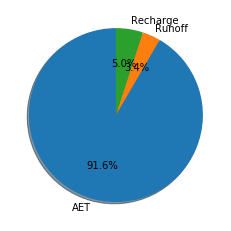

In [147]:
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H0AETD1AveEnd, H0ROD1AveEnd, H0RED1AveEnd], labels=PieHdrs, autopct='%1.1f%%',
          startangle=90, shadow=True )

#### Projection Period 1: 2011-2040

In [148]:
H0PreP1AveEnd, H0AETP1AveEnd, H0ROP1AveEnd, H0REP1AveEnd

(18023.373862146564, 16885.95029663494, 636.5194813305765, 943.3218713319154)

In [149]:
H0DstoP1AveEnd = H0PreP1AveEnd - ( H0AETP1AveEnd + H0ROP1AveEnd + H0REP1AveEnd )
H0DstoP1AveEnd

-442.4177871508655

In [150]:
H0AETP1AveEnd =  H0AETP1AveEnd + H0DstoP1AveEnd

In [151]:
H0PreP1AveEnd, H0AETP1AveEnd, H0ROP1AveEnd, H0REP1AveEnd

(18023.373862146564, 16443.532509484074, 636.5194813305765, 943.3218713319154)

([<matplotlib.patches.Wedge at 0x1d5baf66048>,
 [Text(-0.29910061116780556, -1.0585550644151893, 'AET'),
  Text(0.46833859662681404, 0.995318521333561, 'Runoff'),
  Text(0.18005637351232567, 1.0851634449969232, 'Recharge')],
 [Text(-0.16314578790971213, -0.5773936714991941, '91.2%'),
  Text(0.25545741634189856, 0.5429010116364877, '3.5%'),
  Text(0.09821256737035945, 0.5919073336346853, '5.2%')])

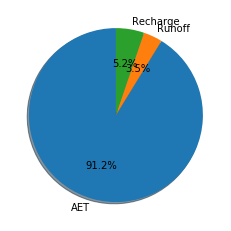

In [152]:
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H0AETP1AveEnd, H0ROP1AveEnd, H0REP1AveEnd], labels=PieHdrs, autopct='%1.1f%%',
          startangle=90, shadow=True )

#### Projection Period 2: 2041-2070

In [153]:
H0PreP2AveEnd, H0AETP2AveEnd, H0ROP2AveEnd, H0REP2AveEnd

(18027.553504038588, 16888.73806838271, 637.0272878813406, 944.0744406401499)

In [154]:
H0DstoP2AveEnd = H0PreP2AveEnd - ( H0AETP2AveEnd + H0ROP2AveEnd + H0REP2AveEnd )
H0DstoP2AveEnd

-442.2862928656141

In [155]:
H0AETP2AveEnd =  H0AETP2AveEnd + H0DstoP2AveEnd

In [156]:
H0PreP2AveEnd, H0AETP2AveEnd, H0ROP2AveEnd, H0REP2AveEnd

(18027.553504038588, 16446.451775517096, 637.0272878813406, 944.0744406401499)

([<matplotlib.patches.Wedge at 0x1d5b1fa7e08>,
 [Text(-0.2992653268333787, -1.0585085092503088, 'AET'),
  Text(0.4685858460636293, 0.9952021427171632, 'Runoff'),
  Text(0.180156855470837, 1.0851467676894495, 'Recharge')],
 [Text(-0.16323563281820655, -0.5773682777728957, '91.2%'),
  Text(0.2555922796710705, 0.5428375323911798, '3.5%'),
  Text(0.09826737571136564, 0.5918982369215179, '5.2%')])

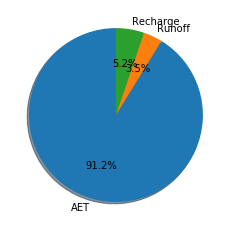

In [157]:
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H0AETP2AveEnd, H0ROP2AveEnd, H0REP2AveEnd], labels=PieHdrs, autopct='%1.1f%%',
          startangle=90, shadow=True )

#### Projection Period 3: 2071-2099

In [158]:
H0PreP3AveEnd, H0AETP3AveEnd, H0ROP3AveEnd, H0REP3AveEnd

(18027.545551852836, 16888.10795816609, 637.9315702287654, 945.4145870790279)

In [159]:
H0DstoP3AveEnd = H0PreP3AveEnd - ( H0AETP3AveEnd + H0ROP3AveEnd + H0REP3AveEnd )
H0DstoP3AveEnd

-443.90856362104387

In [160]:
H0AETP3AveEnd =  H0AETP3AveEnd + H0DstoP3AveEnd

In [161]:
H0PreP3AveEnd, H0AETP3AveEnd, H0ROP3AveEnd, H0REP3AveEnd

(18027.545551852836, 16444.199394545045, 637.9315702287654, 945.4145870790279)

([<matplotlib.patches.Wedge at 0x1d5c6060d08>,
 [Text(-0.2996793634428416, -1.0583913638756193, 'AET'),
  Text(0.46920747013681113, 0.9949092169478648, 'Runoff'),
  Text(0.18041019979835887, 1.085104676890076, 'Recharge')],
 [Text(-0.16346147096882266, -0.5773043802957922, '91.2%'),
  Text(0.2559313473473515, 0.5426777546988353, '3.5%'),
  Text(0.09840556352637757, 0.5918752783036778, '5.2%')])

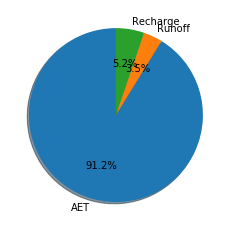

In [162]:
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H0AETP3AveEnd, H0ROP3AveEnd, H0REP3AveEnd], labels=PieHdrs, autopct='%1.1f%%',
          startangle=90, shadow=True )

([<matplotlib.patches.Wedge at 0x1d5ae7a37c8>,
 [Text(-0.17184169294636872, -0.637236559344586, ''),
  Text(0.26953062271212214, 0.6024560095313316, ''),
  Text(0.10337543426117828, 0.6518539097001053, '')])

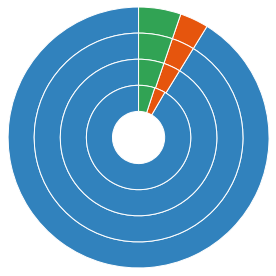

In [163]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
size = 0.3
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H0AETP3AveEnd, H0ROP3AveEnd, H0REP3AveEnd], radius=1.5, colors=outer_colors,
          wedgeprops=dict(width=size, edgecolor='w' ), startangle=90)
ax11.pie( [H0AETP2AveEnd, H0ROP2AveEnd, H0REP2AveEnd], radius=(1.5 - (1.0*size)), 
          colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w' ), startangle=90 )
ax11.pie( [H0AETP1AveEnd, H0ROP1AveEnd, H0REP1AveEnd], radius=(1.5 - (2.0*size)), 
          colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w' ), startangle=90 )
ax11.pie( [H0AETD1AveEnd, H0ROD1AveEnd, H0RED1AveEnd], radius=(1.5 - (3.0*size)), 
          colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w' ), startangle=90 )

### H1

#### Data Period: 1981-2010

In [164]:
H1PreD1AveEnd, H1AETD1AveEnd, H1ROD1AveEnd, H1RED1AveEnd

(18031.2440081906, 16889.56481614204, 609.1047433428791, 902.6932296341467)

In [165]:
H1DstoD1AveEnd = H1PreD1AveEnd - ( H1AETD1AveEnd + H1ROD1AveEnd + H1RED1AveEnd )
H1DstoD1AveEnd

-370.11878092846746

If change in storage is negative, then reduce AET

In [166]:
H1AETD1AveEnd =  H1AETD1AveEnd + H1DstoD1AveEnd

In [167]:
H1PreD1AveEnd, H1AETD1AveEnd, H1ROD1AveEnd, H1RED1AveEnd

(18031.2440081906, 16519.446035213572, 609.1047433428791, 902.6932296341467)

([<matplotlib.patches.Wedge at 0x1d5d94c1088>,
 [Text(-0.28640282157728114, -1.0620609322409766, 'AET'),
  Text(0.4492176927689535, 1.0040933544762352, 'Runoff'),
  Text(0.17229233957615675, 1.0864231908990964, 'Recharge')],
 [Text(-0.15621972086033517, -0.5793059630405326, '91.6%'),
  Text(0.24502783241942916, 0.5476872842597645, '3.4%'),
  Text(0.09397763976881277, 0.5925944677631434, '5.0%')])

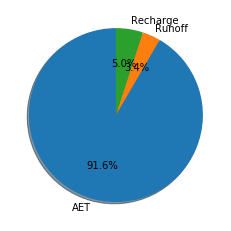

In [168]:
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H1AETD1AveEnd, H1ROD1AveEnd, H1RED1AveEnd], labels=PieHdrs, autopct='%1.1f%%',
          startangle=90, shadow=True )

#### Projection Period 1: 2011-2040

In [169]:
H1PreP1AveEnd, H1AETP1AveEnd, H1ROP1AveEnd, H1REP1AveEnd

(23964.06579578101, 20940.279015877302, 1482.0555733770918, 2196.406359744849)

In [170]:
H1DstoP1AveEnd = H1PreP1AveEnd - ( H1AETP1AveEnd + H1ROP1AveEnd + H1REP1AveEnd )
H1DstoP1AveEnd

-654.6751532182316

In [171]:
H1AETP1AveEnd =  H1AETP1AveEnd + H1DstoP1AveEnd

In [172]:
H1PreP1AveEnd, H1AETP1AveEnd, H1ROP1AveEnd, H1REP1AveEnd

(23964.06579578101, 20285.60386265907, 1482.0555733770918, 2196.406359744849)

([<matplotlib.patches.Wedge at 0x1d5e5c2c788>,
 [Text(-0.5101331283167017, -0.9745584597107635, 'AET'),
  Text(0.7658842247660932, 0.7895703605470766, 'Runoff'),
  Text(0.3123753865424466, 1.0547139981447373, 'Recharge')],
 [Text(-0.2782544336272918, -0.5315773416604164, '84.7%'),
  Text(0.41775503169059625, 0.4306747421165872, '6.2%'),
  Text(0.17038657447769814, 0.575298544442584, '9.2%')])

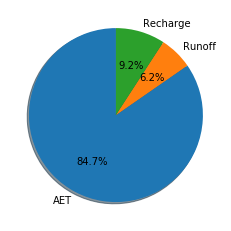

In [173]:
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H1AETP1AveEnd, H1ROP1AveEnd, H1REP1AveEnd], labels=PieHdrs, autopct='%1.1f%%',
          startangle=90, shadow=True )

#### Projection Period 2: 2041-2070

In [174]:
H1PreP2AveEnd, H1AETP2AveEnd, H1ROP2AveEnd, H1REP2AveEnd

(23679.81026890644, 20896.234989275486, 1412.7108979340119, 2093.6375507382104)

In [175]:
H1DstoP2AveEnd = H1PreP2AveEnd - ( H1AETP2AveEnd + H1ROP2AveEnd + H1REP2AveEnd )
H1DstoP2AveEnd

-722.7731690412693

In [176]:
H1AETP2AveEnd =  H1AETP2AveEnd + H1DstoP2AveEnd

In [177]:
H1PreP2AveEnd, H1AETP2AveEnd, H1ROP2AveEnd, H1REP2AveEnd

(23679.81026890644, 20173.461820234217, 1412.7108979340119, 2093.6375507382104)

([<matplotlib.patches.Wedge at 0x1d5c981ca88>,
 [Text(-0.49344798881002927, -0.9831119378480445, 'AET'),
  Text(0.7441083168280971, 0.8101251834298553, 'Runoff'),
  Text(0.3016245617560878, 1.0578386567645597, 'Recharge')],
 [Text(-0.2691534484418341, -0.5362428751898424, '85.2%'),
  Text(0.4058772637244165, 0.4418864636890119, '6.0%'),
  Text(0.16452248823059332, 0.5770029036897598, '8.8%')])

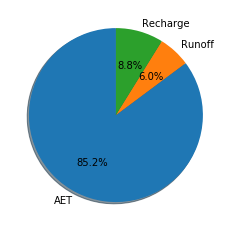

In [178]:
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H1AETP2AveEnd, H1ROP2AveEnd, H1REP2AveEnd], labels=PieHdrs, autopct='%1.1f%%',
          startangle=90, shadow=True )

#### Projection Period 3: 2071-2099

In [179]:
H1PreP3AveEnd, H1AETP3AveEnd, H1ROP3AveEnd, H1REP3AveEnd

(23569.58421453207, 20757.618347813986, 1406.348707374545, 2084.208784329092)

In [180]:
H1DstoP3AveEnd = H1PreP3AveEnd - ( H1AETP3AveEnd + H1ROP3AveEnd + H1REP3AveEnd )
H1DstoP3AveEnd

-678.5916249855509

In [181]:
H1AETP3AveEnd =  H1AETP3AveEnd + H1DstoP3AveEnd

In [182]:
H1PreP3AveEnd, H1AETP3AveEnd, H1ROP3AveEnd, H1REP3AveEnd

(23569.58421453207, 20079.026722828436, 1406.348707374545, 2084.208784329092)

([<matplotlib.patches.Wedge at 0x1d5e4c38e48>,
 [Text(-0.4935177581189146, -0.9830769158215855, 'AET'),
  Text(0.7442002415022849, 0.8100407400544376, 'Runoff'),
  Text(0.3016698731957126, 1.0578257359348386, 'Recharge')],
 [Text(-0.2691915044284988, -0.5362237722663193, '85.2%'),
  Text(0.40592740445579173, 0.4418404036660568, '6.0%'),
  Text(0.16454720356129776, 0.5769958559644573, '8.8%')])

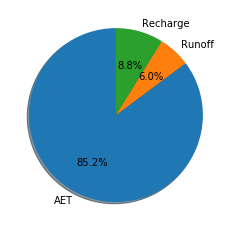

In [183]:
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H1AETP3AveEnd, H1ROP3AveEnd, H1REP3AveEnd], labels=PieHdrs, autopct='%1.1f%%',
          startangle=90, shadow=True )

([<matplotlib.patches.Wedge at 0x1d5d84153c8>,
 [Text(-0.17184169294636872, -0.637236559344586, ''),
  Text(0.26953061566137215, 0.6024560126857411, ''),
  Text(0.10337540374569407, 0.651853914539458, '')])

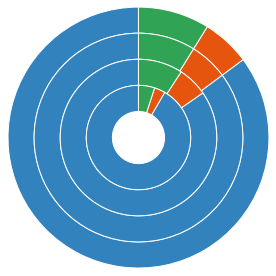

In [184]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
size = 0.3
Fig1 = plt.figure()
ax11 = Fig1.add_subplot(111)
ax11.pie( [H1AETP3AveEnd, H1ROP3AveEnd, H1REP3AveEnd], radius=1.5, colors=outer_colors,
          wedgeprops=dict(width=size, edgecolor='w' ), startangle=90 )
ax11.pie( [H1AETP2AveEnd, H1ROP2AveEnd, H1REP2AveEnd], radius=(1.5 - (1.0*size)), 
          colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w' ), startangle=90 )
ax11.pie( [H1AETP1AveEnd, H1ROP1AveEnd, H1REP1AveEnd], radius=(1.5 - (2.0*size)), 
          colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w' ), startangle=90 )
ax11.pie( [H1AETD1AveEnd, H1ROD1AveEnd, H1RED1AveEnd], radius=(1.5 - (3.0*size)), 
          colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w' ), startangle=90 )